In [1]:
!pip install wget
import os
import torch
import pandas as pd
import numpy as np
import torch
from torch import nn


ssh_config = """
Host github.com
  IdentityFile ~/.ssh/github.pem
  User davipeag
  StrictHostKeyChecking no
"""

if os.name == 'nt':
  base_path = ""
  REPO_DIR = "."
  STORE_DIR ="." 
  print("Windows")
else:
  print("Unix-like")
  REPO_DIR = "/tmp/HeartRateRegression"
  from google.colab import drive
  drive.mount('/content/drive')
  GIT_PATH = "/content/drive/My\ Drive/deeplearning_project/github.pem"
  DATA_DIR = os.path.join(REPO_DIR, "repo")
  STORE_DIR ="/content/drive/My Drive/deeplearning_project/" 
  !mkdir ~/.ssh
  !cp -u {GIT_PATH} ~/.ssh/
  !chmod u=rw,g=,o= ~/.ssh/github.pem
  !echo "{ssh_config}" > ~/.ssh/config
  !chmod u=rw,g=,o= ~/.ssh/config
  ! (cd /tmp && git clone git@github.com:davipeag/HeartRateRegression.git)
  ! (cd {REPO_DIR} && git pull )
  import sys
  sys.path.append(REPO_DIR)

def git_pull():
  ! (cd {REPO_DIR} && git pull )

git_pull()

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=4e501f8cb2adf54b9d34e56855822231d2f69d4ab4085450c332ac7d69ca7558
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Unix-like
Mounted at /content/drive
Cloning into 'HeartRateRegression'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 1549 (delta 113), reused 111 (delta 53), pack-reused 1363
Receiving objects: 100% (1549/1549), 104.17 MiB | 28.28 MiB/s, done.
Resolving deltas: 100% (1012/1012), done.
Already up to date.
Already up to date.


In [2]:
import random
import torch
from torch import nn
import numpy as np
args = {
    'epoch_num': 250,     # Number of epochs.
    'lr': 1.0e-3,           # Learning rate.
    'weight_decay': 10e-4, # L2 penalty.
    'momentum': 0.9,      # Momentum.
    'num_workers': 0,     # Number of workers on data loader.
    'batch_size': 128,     # Mini-batch size. 128
    'batch_test': 248,     # size of test batch
    'window': 15,
    'initial_window':5,
    'clip_norm': 6.0,     # Upper limit on gradient L2 norm ###
}
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

SEED = 1234
def reset_seeds():
  random.seed(SEED)
  np.random.seed(SEED)
  torch.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  torch.cuda.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

reset_seeds()

cuda


In [3]:
from data_utils import (Pamap2Handler, FormatPamap)

SUBJECTS = list(range(1,9))

handler = Pamap2Handler(DATA_DIR)
formatter = FormatPamap()
dfs_train = [formatter.transform(handler.get_protocol_subject(i)) for i in SUBJECTS]
[len(df)//200 for df in dfs_train]

download


[1882, 2235, 1264, 1647, 1873, 1809, 1567, 2040]

In [4]:
git_pull()

import importlib

import PPG
import preprocessing_utils
from PPG import FullTrainer
import RegressionHR

from RegressionHR import FullTrainer
from RegressionHR import PceLstmDefaults
from RegressionHR import PceLstmModel
from RegressionHR import TrainerJoint
from RegressionHR import  UtilitiesData


importlib.reload(PPG.AttentionDefaults)
importlib.reload(PPG)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(PPG.Models)
importlib.reload(PPG.NoHrPceLstmModel)
importlib.reload(PPG.TrainerXY)
importlib.reload(PPG.TrainerIS)
importlib.reload(PPG.FullTrainer)
importlib.reload(PceLstmDefaults)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR)
importlib.reload(RegressionHR.FullTrainer)
importlib.reload(RegressionHR.PceLstmDefaults)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR.TrainerJoint)
importlib.reload(RegressionHR.UtilitiesData)
importlib.reload(RegressionHR.PceLstmModel)
importlib.reload(preprocessing_utils)


Already up to date.


<module 'preprocessing_utils' from '/tmp/HeartRateRegression/preprocessing_utils.py'>

In [5]:
import matplotlib.pyplot as plt
import pickle

def compute_ensemble(results):
  
  ys = [v["predictions"][0].reshape(-1).numpy() for v in results]
  min_len_y = min([len(y) for y in ys])
  ys = [y[:min_len_y] for y in ys]
  for i in range(1, len(ys)-1):
    assert np.all(ys[i] == ys[i-1])
  ps = np.stack([v["predictions"][1].reshape(-1).numpy()[:min_len_y] for v in results])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.figure()

  plt.plot(a)
  plt.plot(y)

  plt.show()

  return np.mean(np.abs(a - y)), np.mean(np.abs(ps - y))



best val epoch: 2
[2/80]: loss_train: 18.460 loss_val 20.590 loss_ts 23.570
best val epoch: 3
[3/80]: loss_train: 16.805 loss_val 19.277 loss_ts 22.883
best val epoch: 4
[4/80]: loss_train: 14.377 loss_val 18.474 loss_ts 22.270
best val epoch: 5
[5/80]: loss_train: 14.241 loss_val 16.663 loss_ts 17.180
best val epoch: 8
[8/80]: loss_train: 12.315 loss_val 15.191 loss_ts 18.182
best val epoch: 10
[10/80]: loss_train: 11.282 loss_val 14.879 loss_ts 18.024
best val epoch: 12
[12/80]: loss_train: 10.199 loss_val 11.800 loss_ts 14.662
best val epoch: 20
[20/80]: loss_train: 9.249 loss_val 11.556 loss_ts 16.709
best val epoch: 23
[23/80]: loss_train: 8.150 loss_val 11.050 loss_ts 14.961
best val epoch: 32
[32/80]: loss_train: 8.387 loss_val 10.086 loss_ts 16.984
best val epoch: 34
[34/80]: loss_train: 6.998 loss_val 8.158 loss_ts 12.931
best val epoch: 56
[56/80]: loss_train: 5.944 loss_val 7.291 loss_ts 10.965
best val epoch: 65
[65/80]: loss_train: 5.378 loss_val 7.012 loss_ts 11.264
Final

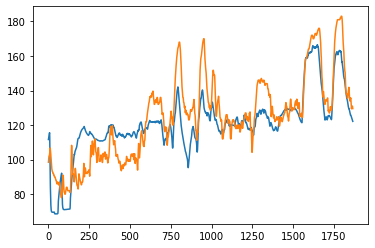

0-TS:(11.264494, 11.264494)
best val epoch: 1
[1/80]: loss_train: 18.194 loss_val 20.574 loss_ts 15.223
best val epoch: 2
[2/80]: loss_train: 19.325 loss_val 20.573 loss_ts 16.064
best val epoch: 3
[3/80]: loss_train: 15.923 loss_val 17.367 loss_ts 11.851
best val epoch: 4
[4/80]: loss_train: 17.246 loss_val 15.238 loss_ts 12.735
best val epoch: 5
[5/80]: loss_train: 13.682 loss_val 12.375 loss_ts 10.532
best val epoch: 7
[7/80]: loss_train: 11.997 loss_val 11.529 loss_ts 9.842
best val epoch: 10
[10/80]: loss_train: 11.560 loss_val 10.325 loss_ts 7.788
best val epoch: 15
[15/80]: loss_train: 10.260 loss_val 9.136 loss_ts 9.837
best val epoch: 16
[16/80]: loss_train: 10.611 loss_val 8.455 loss_ts 12.147
best val epoch: 18
[18/80]: loss_train: 9.561 loss_val 7.509 loss_ts 9.299
best val epoch: 21
[21/80]: loss_train: 7.604 loss_val 7.165 loss_ts 9.997
Final: 9.996566772460938
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_

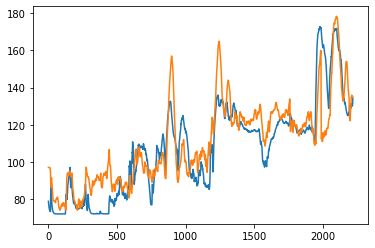

1-TS:(9.996567, 9.996567)
best val epoch: 1
[1/80]: loss_train: 20.511 loss_val 17.746 loss_ts 22.658
best val epoch: 2
[2/80]: loss_train: 19.526 loss_val 16.490 loss_ts 21.599
best val epoch: 3
[3/80]: loss_train: 18.790 loss_val 14.835 loss_ts 19.516
best val epoch: 4
[4/80]: loss_train: 13.467 loss_val 11.065 loss_ts 13.338
best val epoch: 9
[9/80]: loss_train: 12.821 loss_val 10.851 loss_ts 13.477
best val epoch: 10
[10/80]: loss_train: 10.940 loss_val 9.296 loss_ts 11.391
best val epoch: 15
[15/80]: loss_train: 9.746 loss_val 8.749 loss_ts 7.014
best val epoch: 16
[16/80]: loss_train: 8.933 loss_val 8.071 loss_ts 10.657
best val epoch: 26
[26/80]: loss_train: 8.099 loss_val 7.886 loss_ts 7.472
best val epoch: 28
[28/80]: loss_train: 6.953 loss_val 6.439 loss_ts 9.150
Final: 9.150036811828613
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_s': 4, 'step_s': 2, 'ts_per_is': 12, 'ts_per_sample': 50, 'ts_sub': 2, 'batch_s

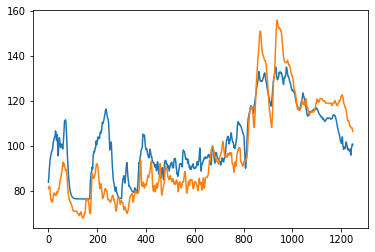

2-TS:(9.150037, 9.150037)
best val epoch: 2
[2/80]: loss_train: 18.253 loss_val 21.265 loss_ts 13.594
best val epoch: 4
[4/80]: loss_train: 15.008 loss_val 17.133 loss_ts 12.715
best val epoch: 6
[6/80]: loss_train: 14.803 loss_val 17.110 loss_ts 14.918
best val epoch: 7
[7/80]: loss_train: 12.266 loss_val 14.433 loss_ts 12.138
best val epoch: 9
[9/80]: loss_train: 11.603 loss_val 14.323 loss_ts 13.109
best val epoch: 11
[11/80]: loss_train: 11.652 loss_val 14.014 loss_ts 16.639
best val epoch: 13
[13/80]: loss_train: 9.387 loss_val 12.050 loss_ts 13.931
best val epoch: 16
[16/80]: loss_train: 9.214 loss_val 11.793 loss_ts 14.269
best val epoch: 20
[20/80]: loss_train: 7.369 loss_val 8.287 loss_ts 14.467
best val epoch: 24
[24/80]: loss_train: 6.407 loss_val 8.193 loss_ts 13.917
best val epoch: 25
[25/80]: loss_train: 6.009 loss_val 7.904 loss_ts 12.794
best val epoch: 28
[28/80]: loss_train: 6.181 loss_val 7.567 loss_ts 10.862
best val epoch: 63
[63/80]: loss_train: 4.970 loss_val 7.1

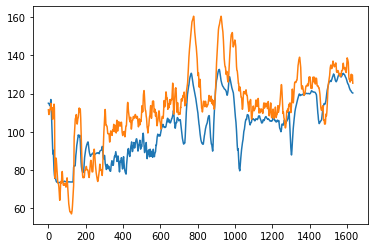

3-TS:(12.464774, 12.464774)
best val epoch: 1
[1/80]: loss_train: 20.817 loss_val 17.336 loss_ts 21.408
best val epoch: 2
[2/80]: loss_train: 20.224 loss_val 16.884 loss_ts 20.749
best val epoch: 3
[3/80]: loss_train: 17.383 loss_val 15.795 loss_ts 19.858
best val epoch: 5
[5/80]: loss_train: 15.597 loss_val 14.888 loss_ts 16.592
best val epoch: 7
[7/80]: loss_train: 14.236 loss_val 13.772 loss_ts 15.456
best val epoch: 10
[10/80]: loss_train: 14.012 loss_val 13.490 loss_ts 16.362
best val epoch: 15
[15/80]: loss_train: 12.114 loss_val 12.313 loss_ts 13.057
best val epoch: 18
[18/80]: loss_train: 10.446 loss_val 10.939 loss_ts 13.425
best val epoch: 20
[20/80]: loss_train: 10.060 loss_val 10.157 loss_ts 12.317
best val epoch: 28
[28/80]: loss_train: 9.641 loss_val 10.013 loss_ts 12.637
best val epoch: 30
[30/80]: loss_train: 9.122 loss_val 8.710 loss_ts 11.647
best val epoch: 53
[53/80]: loss_train: 8.826 loss_val 8.292 loss_ts 12.566
best val epoch: 68
[68/80]: loss_train: 9.025 loss_

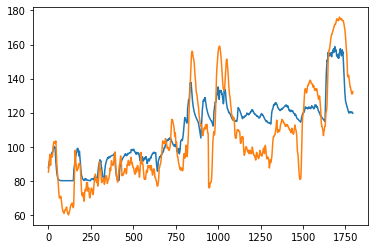

5-TS:(12.189925, 12.189925)
best val epoch: 2
[2/80]: loss_train: 19.991 loss_val 21.180 loss_ts 22.742
best val epoch: 3
[3/80]: loss_train: 18.433 loss_val 19.665 loss_ts 22.264
best val epoch: 5
[5/80]: loss_train: 18.317 loss_val 18.117 loss_ts 17.959
best val epoch: 6
[6/80]: loss_train: 15.018 loss_val 15.295 loss_ts 14.840
best val epoch: 7
[7/80]: loss_train: 15.370 loss_val 14.836 loss_ts 16.345
best val epoch: 8
[8/80]: loss_train: 13.414 loss_val 13.196 loss_ts 12.724
best val epoch: 13
[13/80]: loss_train: 12.834 loss_val 12.512 loss_ts 15.689
best val epoch: 18
[18/80]: loss_train: 11.298 loss_val 11.594 loss_ts 16.750
best val epoch: 23
[23/80]: loss_train: 8.599 loss_val 8.423 loss_ts 23.781
best val epoch: 28
[28/80]: loss_train: 7.683 loss_val 8.290 loss_ts 14.645
best val epoch: 43
[43/80]: loss_train: 7.083 loss_val 8.105 loss_ts 17.469
Final: 17.46925163269043
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'pe

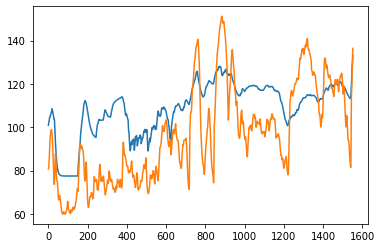

6-TS:(17.469252, 17.469252)
best val epoch: 1
[1/80]: loss_train: 20.668 loss_val 15.752 loss_ts 24.313
best val epoch: 2
[2/80]: loss_train: 20.715 loss_val 15.668 loss_ts 23.991
best val epoch: 3
[3/80]: loss_train: 17.610 loss_val 14.375 loss_ts 22.780
best val epoch: 5
[5/80]: loss_train: 16.089 loss_val 13.136 loss_ts 29.241
best val epoch: 7
[7/80]: loss_train: 14.517 loss_val 12.087 loss_ts 26.348
best val epoch: 8
[8/80]: loss_train: 13.930 loss_val 12.016 loss_ts 31.132
best val epoch: 9
[9/80]: loss_train: 12.460 loss_val 10.879 loss_ts 27.259
best val epoch: 12
[12/80]: loss_train: 11.634 loss_val 10.640 loss_ts 23.962
best val epoch: 13
[13/80]: loss_train: 12.658 loss_val 10.275 loss_ts 25.354
best val epoch: 18
[18/80]: loss_train: 10.707 loss_val 9.186 loss_ts 23.203
best val epoch: 24
[24/80]: loss_train: 10.702 loss_val 9.099 loss_ts 26.612
best val epoch: 34
[34/80]: loss_train: 10.799 loss_val 9.052 loss_ts 29.156
best val epoch: 35
[35/80]: loss_train: 9.992 loss_va

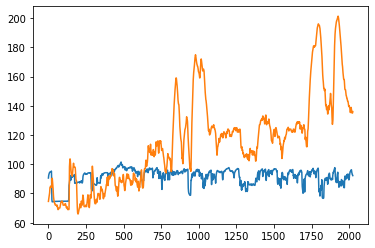

7-TS:(29.288965, 29.288965)
best val epoch: 1
[1/80]: loss_train: 19.196 loss_val 20.221 loss_ts 23.522
best val epoch: 2
[2/80]: loss_train: 17.309 loss_val 18.758 loss_ts 22.591
best val epoch: 3
[3/80]: loss_train: 15.513 loss_val 16.959 loss_ts 23.548
best val epoch: 4
[4/80]: loss_train: 14.677 loss_val 16.162 loss_ts 22.729
best val epoch: 6
[6/80]: loss_train: 14.223 loss_val 15.975 loss_ts 17.145
best val epoch: 7
[7/80]: loss_train: 12.937 loss_val 15.501 loss_ts 19.848
best val epoch: 9
[9/80]: loss_train: 12.812 loss_val 15.092 loss_ts 19.242
best val epoch: 12
[12/80]: loss_train: 12.218 loss_val 14.744 loss_ts 15.101
best val epoch: 13
[13/80]: loss_train: 11.039 loss_val 13.585 loss_ts 13.594
best val epoch: 15
[15/80]: loss_train: 10.276 loss_val 13.410 loss_ts 16.397
best val epoch: 16
[16/80]: loss_train: 10.620 loss_val 13.087 loss_ts 16.981
best val epoch: 18
[18/80]: loss_train: 10.492 loss_val 12.550 loss_ts 13.023
best val epoch: 22
[22/80]: loss_train: 10.220 los

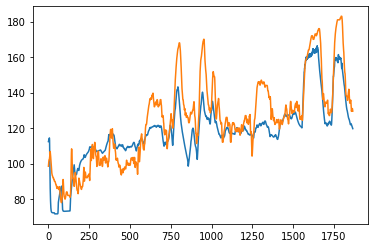

0-TS:(10.389071, 10.804912)
best val epoch: 1
[1/80]: loss_train: 21.786 loss_val 18.568 loss_ts 18.615
best val epoch: 2
[2/80]: loss_train: 20.651 loss_val 18.143 loss_ts 17.268
best val epoch: 3
[3/80]: loss_train: 21.112 loss_val 17.455 loss_ts 17.749
best val epoch: 4
[4/80]: loss_train: 21.152 loss_val 17.157 loss_ts 17.738
best val epoch: 6
[6/80]: loss_train: 18.354 loss_val 15.449 loss_ts 13.866
best val epoch: 7
[7/80]: loss_train: 15.116 loss_val 13.867 loss_ts 10.402
best val epoch: 8
[8/80]: loss_train: 14.701 loss_val 13.587 loss_ts 11.207
best val epoch: 9
[9/80]: loss_train: 15.373 loss_val 13.523 loss_ts 12.527
best val epoch: 10
[10/80]: loss_train: 13.837 loss_val 12.588 loss_ts 12.224
best val epoch: 12
[12/80]: loss_train: 13.317 loss_val 12.216 loss_ts 11.411
best val epoch: 15
[15/80]: loss_train: 10.418 loss_val 9.878 loss_ts 10.813
best val epoch: 17
[17/80]: loss_train: 9.922 loss_val 9.543 loss_ts 13.266
best val epoch: 36
[36/80]: loss_train: 10.128 loss_val

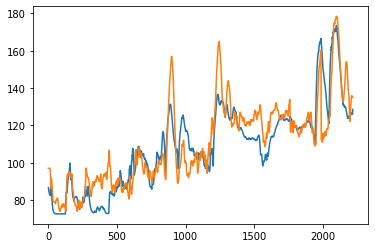

1-TS:(8.541336, 9.435609)
best val epoch: 3
[3/80]: loss_train: 20.384 loss_val 20.106 loss_ts 19.421
best val epoch: 4
[4/80]: loss_train: 18.239 loss_val 17.906 loss_ts 18.755
best val epoch: 5
[5/80]: loss_train: 14.510 loss_val 15.623 loss_ts 15.881
best val epoch: 6
[6/80]: loss_train: 13.988 loss_val 14.773 loss_ts 16.002
best val epoch: 8
[8/80]: loss_train: 13.011 loss_val 14.565 loss_ts 12.651
best val epoch: 10
[10/80]: loss_train: 11.749 loss_val 13.520 loss_ts 12.631
best val epoch: 11
[11/80]: loss_train: 11.547 loss_val 12.714 loss_ts 10.721
best val epoch: 13
[13/80]: loss_train: 9.545 loss_val 10.710 loss_ts 13.817
best val epoch: 16
[16/80]: loss_train: 8.519 loss_val 10.277 loss_ts 10.664
best val epoch: 18
[18/80]: loss_train: 9.258 loss_val 9.509 loss_ts 10.680
best val epoch: 24
[24/80]: loss_train: 6.532 loss_val 8.688 loss_ts 11.016
best val epoch: 27
[27/80]: loss_train: 7.412 loss_val 8.617 loss_ts 9.772
best val epoch: 29
[29/80]: loss_train: 6.869 loss_val 7.

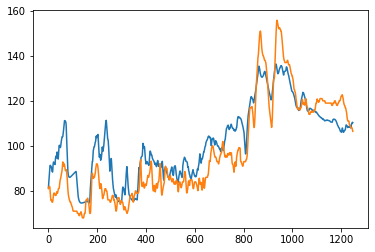

2-TS:(8.43664, 8.933075)
best val epoch: 1
[1/80]: loss_train: 20.464 loss_val 22.018 loss_ts 14.585
best val epoch: 3
[3/80]: loss_train: 13.800 loss_val 16.682 loss_ts 12.148
best val epoch: 4
[4/80]: loss_train: 14.744 loss_val 15.840 loss_ts 15.584
best val epoch: 6
[6/80]: loss_train: 13.852 loss_val 15.807 loss_ts 16.555
best val epoch: 7
[7/80]: loss_train: 12.189 loss_val 15.171 loss_ts 14.775
best val epoch: 10
[10/80]: loss_train: 10.727 loss_val 13.777 loss_ts 13.712
best val epoch: 12
[12/80]: loss_train: 9.870 loss_val 13.363 loss_ts 11.086
best val epoch: 14
[14/80]: loss_train: 9.074 loss_val 12.279 loss_ts 13.291
best val epoch: 15
[15/80]: loss_train: 11.276 loss_val 12.015 loss_ts 19.670
best val epoch: 17
[17/80]: loss_train: 9.512 loss_val 10.080 loss_ts 19.623
best val epoch: 22
[22/80]: loss_train: 7.474 loss_val 9.930 loss_ts 17.626
best val epoch: 25
[25/80]: loss_train: 7.083 loss_val 8.502 loss_ts 16.032
best val epoch: 36
[36/80]: loss_train: 7.321 loss_val 8

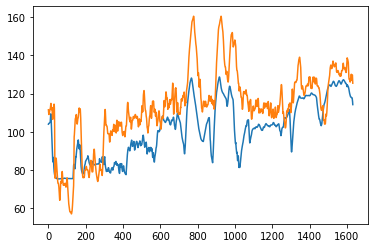

3-TS:(13.894182, 14.064932)
best val epoch: 2
[2/80]: loss_train: 20.749 loss_val 20.174 loss_ts 19.299
best val epoch: 3
[3/80]: loss_train: 17.513 loss_val 17.590 loss_ts 17.253
best val epoch: 4
[4/80]: loss_train: 15.445 loss_val 15.620 loss_ts 16.829
best val epoch: 5
[5/80]: loss_train: 14.027 loss_val 13.842 loss_ts 16.208
best val epoch: 8
[8/80]: loss_train: 11.937 loss_val 11.701 loss_ts 14.094
best val epoch: 11
[11/80]: loss_train: 10.472 loss_val 10.707 loss_ts 15.929
best val epoch: 15
[15/80]: loss_train: 10.066 loss_val 9.788 loss_ts 15.696
best val epoch: 16
[16/80]: loss_train: 9.252 loss_val 9.295 loss_ts 12.160
best val epoch: 20
[20/80]: loss_train: 9.182 loss_val 9.245 loss_ts 9.759
best val epoch: 22
[22/80]: loss_train: 8.437 loss_val 8.784 loss_ts 12.109
best val epoch: 25
[25/80]: loss_train: 9.439 loss_val 8.699 loss_ts 11.666
best val epoch: 28
[28/80]: loss_train: 8.503 loss_val 8.286 loss_ts 10.110
best val epoch: 30
[30/80]: loss_train: 7.563 loss_val 7.6

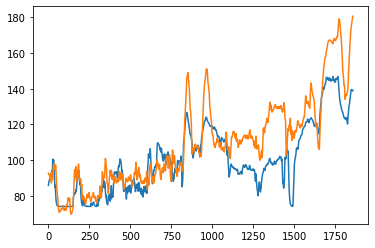

4-TS:(11.699074, 11.699074)
best val epoch: 1
[1/80]: loss_train: 18.024 loss_val 15.383 loss_ts 25.315
best val epoch: 2
[2/80]: loss_train: 17.232 loss_val 14.253 loss_ts 19.802
best val epoch: 3
[3/80]: loss_train: 15.829 loss_val 13.352 loss_ts 16.903
best val epoch: 4
[4/80]: loss_train: 14.714 loss_val 12.801 loss_ts 12.561
best val epoch: 5
[5/80]: loss_train: 13.328 loss_val 11.681 loss_ts 16.993
best val epoch: 9
[9/80]: loss_train: 11.600 loss_val 10.609 loss_ts 14.497
best val epoch: 17
[17/80]: loss_train: 9.089 loss_val 8.301 loss_ts 18.025
best val epoch: 21
[21/80]: loss_train: 8.434 loss_val 8.008 loss_ts 14.926
best val epoch: 29
[29/80]: loss_train: 8.039 loss_val 7.986 loss_ts 14.548
best val epoch: 33
[33/80]: loss_train: 6.497 loss_val 6.990 loss_ts 16.805
best val epoch: 36
[36/80]: loss_train: 5.689 loss_val 6.059 loss_ts 16.348
best val epoch: 67
[67/80]: loss_train: 5.397 loss_val 5.995 loss_ts 16.049
Final: 16.049171447753906
{'net_args': {'dropout_rate': 0.15

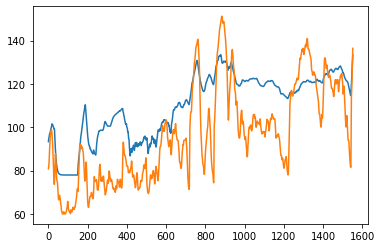

6-TS:(16.215055, 16.759212)
best val epoch: 1
[1/80]: loss_train: 20.795 loss_val 15.970 loss_ts 24.455
best val epoch: 2
[2/80]: loss_train: 16.283 loss_val 13.340 loss_ts 22.509
best val epoch: 5
[5/80]: loss_train: 14.390 loss_val 13.282 loss_ts 24.001
best val epoch: 8
[8/80]: loss_train: 13.875 loss_val 12.558 loss_ts 25.877
best val epoch: 9
[9/80]: loss_train: 13.268 loss_val 12.466 loss_ts 26.601
best val epoch: 10
[10/80]: loss_train: 14.006 loss_val 12.429 loss_ts 27.479
best val epoch: 11
[11/80]: loss_train: 13.934 loss_val 11.382 loss_ts 25.253
best val epoch: 24
[24/80]: loss_train: 12.225 loss_val 10.972 loss_ts 25.652
best val epoch: 29
[29/80]: loss_train: 11.757 loss_val 10.801 loss_ts 28.719
best val epoch: 30
[30/80]: loss_train: 11.741 loss_val 10.731 loss_ts 29.707
best val epoch: 31
[31/80]: loss_train: 9.723 loss_val 9.890 loss_ts 25.444
best val epoch: 32
[32/80]: loss_train: 11.094 loss_val 9.217 loss_ts 26.265
best val epoch: 36
[36/80]: loss_train: 9.177 los

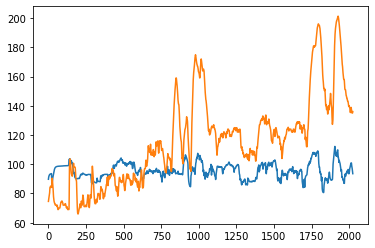

7-TS:(28.210653, 28.366323)
best val epoch: 1
[1/80]: loss_train: 19.721 loss_val 21.860 loss_ts 23.808
best val epoch: 2
[2/80]: loss_train: 17.272 loss_val 19.621 loss_ts 17.252
best val epoch: 4
[4/80]: loss_train: 13.524 loss_val 15.188 loss_ts 15.730
best val epoch: 7
[7/80]: loss_train: 11.884 loss_val 14.612 loss_ts 18.756
best val epoch: 8
[8/80]: loss_train: 12.044 loss_val 14.259 loss_ts 18.575
best val epoch: 11
[11/80]: loss_train: 12.772 loss_val 14.134 loss_ts 20.195
best val epoch: 15
[15/80]: loss_train: 10.949 loss_val 13.167 loss_ts 17.223
best val epoch: 18
[18/80]: loss_train: 10.046 loss_val 12.608 loss_ts 18.335
best val epoch: 22
[22/80]: loss_train: 8.709 loss_val 10.749 loss_ts 16.595
best val epoch: 24
[24/80]: loss_train: 7.880 loss_val 9.765 loss_ts 15.100
best val epoch: 32
[32/80]: loss_train: 8.909 loss_val 9.520 loss_ts 17.665
best val epoch: 43
[43/80]: loss_train: 8.250 loss_val 9.274 loss_ts 20.355
best val epoch: 55
[55/80]: loss_train: 6.228 loss_va

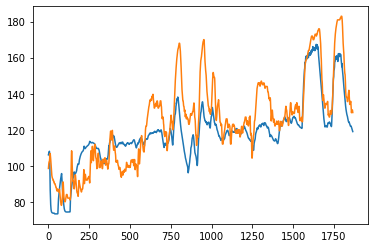

0-TS:(11.220438, 11.809506)
best val epoch: 2
[2/80]: loss_train: 21.169 loss_val 21.149 loss_ts 18.648
best val epoch: 4
[4/80]: loss_train: 21.166 loss_val 21.134 loss_ts 18.643
best val epoch: 5
[5/80]: loss_train: 21.115 loss_val 21.033 loss_ts 18.612
best val epoch: 6
[6/80]: loss_train: 20.092 loss_val 20.327 loss_ts 17.998
best val epoch: 7
[7/80]: loss_train: 17.349 loss_val 18.168 loss_ts 16.379
best val epoch: 9
[9/80]: loss_train: 15.290 loss_val 16.465 loss_ts 14.729
best val epoch: 11
[11/80]: loss_train: 14.091 loss_val 15.259 loss_ts 13.355
best val epoch: 13
[13/80]: loss_train: 12.832 loss_val 14.878 loss_ts 11.427
best val epoch: 15
[15/80]: loss_train: 12.702 loss_val 13.554 loss_ts 13.157
best val epoch: 16
[16/80]: loss_train: 12.281 loss_val 12.671 loss_ts 12.272
best val epoch: 17
[17/80]: loss_train: 11.533 loss_val 11.950 loss_ts 12.536
best val epoch: 19
[19/80]: loss_train: 10.534 loss_val 11.026 loss_ts 12.238
best val epoch: 20
[20/80]: loss_train: 9.311 lo

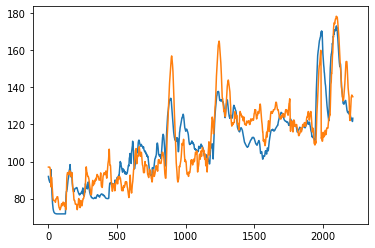

1-TS:(8.683975, 9.933695)
best val epoch: 1
[1/80]: loss_train: 19.754 loss_val 16.159 loss_ts 22.213
best val epoch: 4
[4/80]: loss_train: 20.690 loss_val 15.788 loss_ts 20.441
best val epoch: 5
[5/80]: loss_train: 17.292 loss_val 13.960 loss_ts 20.265
best val epoch: 6
[6/80]: loss_train: 16.525 loss_val 13.335 loss_ts 12.186
best val epoch: 7
[7/80]: loss_train: 14.582 loss_val 12.280 loss_ts 16.252
best val epoch: 10
[10/80]: loss_train: 12.826 loss_val 11.369 loss_ts 11.622
best val epoch: 12
[12/80]: loss_train: 13.176 loss_val 11.034 loss_ts 10.271
best val epoch: 16
[16/80]: loss_train: 10.652 loss_val 10.786 loss_ts 16.264
best val epoch: 17
[17/80]: loss_train: 12.080 loss_val 9.520 loss_ts 8.713
best val epoch: 20
[20/80]: loss_train: 10.102 loss_val 9.145 loss_ts 9.506
best val epoch: 23
[23/80]: loss_train: 8.299 loss_val 7.684 loss_ts 12.878
best val epoch: 27
[27/80]: loss_train: 7.528 loss_val 7.414 loss_ts 11.979
best val epoch: 33
[33/80]: loss_train: 7.745 loss_val 7

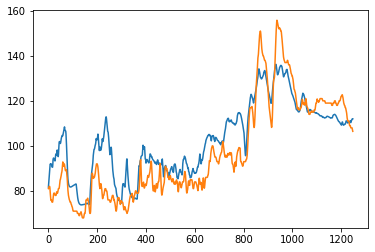

2-TS:(8.77552, 9.196185)
best val epoch: 1
[1/80]: loss_train: 19.597 loss_val 18.309 loss_ts 18.732
best val epoch: 3
[3/80]: loss_train: 17.203 loss_val 16.299 loss_ts 17.024
best val epoch: 4
[4/80]: loss_train: 15.042 loss_val 13.137 loss_ts 17.618
best val epoch: 7
[7/80]: loss_train: 12.067 loss_val 11.356 loss_ts 12.258
best val epoch: 9
[9/80]: loss_train: 11.978 loss_val 11.302 loss_ts 12.004
best val epoch: 13
[13/80]: loss_train: 11.251 loss_val 10.246 loss_ts 16.868
best val epoch: 16
[16/80]: loss_train: 10.275 loss_val 9.697 loss_ts 15.354
best val epoch: 26
[26/80]: loss_train: 9.370 loss_val 9.305 loss_ts 11.777
best val epoch: 27
[27/80]: loss_train: 9.020 loss_val 7.927 loss_ts 10.466
best val epoch: 41
[41/80]: loss_train: 7.661 loss_val 7.635 loss_ts 12.452
best val epoch: 46
[46/80]: loss_train: 6.375 loss_val 6.927 loss_ts 9.647
best val epoch: 75
[75/80]: loss_train: 5.938 loss_val 6.905 loss_ts 10.108
best val epoch: 79
[79/80]: loss_train: 6.465 loss_val 6.810 

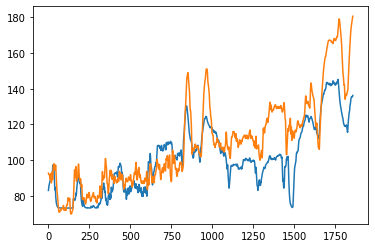

4-TS:(11.944584, 12.236133)
best val epoch: 2
[2/80]: loss_train: 20.706 loss_val 16.230 loss_ts 20.336
best val epoch: 3
[3/80]: loss_train: 18.091 loss_val 14.644 loss_ts 18.835
best val epoch: 6
[6/80]: loss_train: 12.762 loss_val 12.959 loss_ts 15.529
best val epoch: 7
[7/80]: loss_train: 13.976 loss_val 12.901 loss_ts 13.994
best val epoch: 8
[8/80]: loss_train: 11.039 loss_val 12.546 loss_ts 14.061
best val epoch: 9
[9/80]: loss_train: 10.473 loss_val 10.774 loss_ts 13.280
best val epoch: 11
[11/80]: loss_train: 10.902 loss_val 10.463 loss_ts 12.901
best val epoch: 14
[14/80]: loss_train: 9.927 loss_val 10.266 loss_ts 16.518
best val epoch: 16
[16/80]: loss_train: 9.471 loss_val 10.159 loss_ts 14.296
best val epoch: 26
[26/80]: loss_train: 7.426 loss_val 8.653 loss_ts 16.913
best val epoch: 29
[29/80]: loss_train: 7.458 loss_val 7.625 loss_ts 15.617
best val epoch: 46
[46/80]: loss_train: 6.083 loss_val 7.071 loss_ts 14.328
best val epoch: 56
[56/80]: loss_train: 6.851 loss_val 6

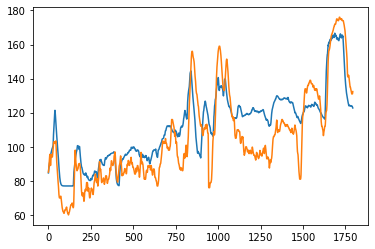

5-TS:(12.896278, 13.296082)
best val epoch: 1
[1/80]: loss_train: 18.323 loss_val 17.922 loss_ts 24.849
best val epoch: 3
[3/80]: loss_train: 15.403 loss_val 15.705 loss_ts 15.232
best val epoch: 5
[5/80]: loss_train: 14.378 loss_val 14.442 loss_ts 19.098
best val epoch: 6
[6/80]: loss_train: 13.059 loss_val 13.678 loss_ts 15.604
best val epoch: 11
[11/80]: loss_train: 11.561 loss_val 12.896 loss_ts 17.539
best val epoch: 13
[13/80]: loss_train: 10.881 loss_val 12.449 loss_ts 17.892
best val epoch: 14
[14/80]: loss_train: 10.168 loss_val 11.849 loss_ts 15.247
best val epoch: 15
[15/80]: loss_train: 9.714 loss_val 11.724 loss_ts 15.981
best val epoch: 16
[16/80]: loss_train: 8.609 loss_val 10.227 loss_ts 18.517
best val epoch: 18
[18/80]: loss_train: 7.615 loss_val 9.725 loss_ts 18.703
best val epoch: 19
[19/80]: loss_train: 7.155 loss_val 9.321 loss_ts 16.010
best val epoch: 26
[26/80]: loss_train: 7.134 loss_val 9.058 loss_ts 13.432
best val epoch: 28
[28/80]: loss_train: 6.552 loss_v

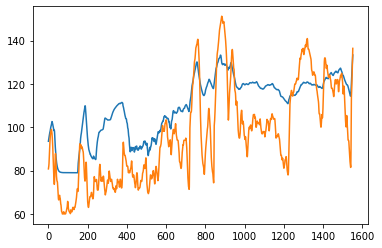

6-TS:(15.838036, 16.241503)
best val epoch: 1
[1/80]: loss_train: 20.348 loss_val 18.595 loss_ts 24.979
best val epoch: 2
[2/80]: loss_train: 19.419 loss_val 17.524 loss_ts 25.672
best val epoch: 5
[5/80]: loss_train: 17.196 loss_val 16.209 loss_ts 24.277
best val epoch: 6
[6/80]: loss_train: 16.443 loss_val 15.510 loss_ts 23.277
best val epoch: 7
[7/80]: loss_train: 15.552 loss_val 15.409 loss_ts 22.319
best val epoch: 8
[8/80]: loss_train: 14.956 loss_val 13.385 loss_ts 24.786
best val epoch: 13
[13/80]: loss_train: 13.958 loss_val 12.949 loss_ts 23.690
best val epoch: 18
[18/80]: loss_train: 12.823 loss_val 12.689 loss_ts 26.497
best val epoch: 28
[28/80]: loss_train: 12.105 loss_val 12.034 loss_ts 23.291
best val epoch: 33
[33/80]: loss_train: 12.313 loss_val 11.881 loss_ts 25.538
best val epoch: 34
[34/80]: loss_train: 11.957 loss_val 11.650 loss_ts 23.056
best val epoch: 35
[35/80]: loss_train: 10.350 loss_val 11.047 loss_ts 23.260
best val epoch: 42
[42/80]: loss_train: 9.363 lo

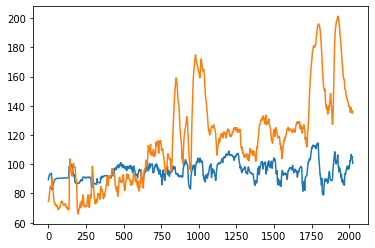

7-TS:(26.585749, 26.928976)
best val epoch: 3
[3/80]: loss_train: 17.507 loss_val 18.092 loss_ts 22.286
best val epoch: 4
[4/80]: loss_train: 13.285 loss_val 14.870 loss_ts 19.307
best val epoch: 6
[6/80]: loss_train: 12.144 loss_val 14.330 loss_ts 19.760
best val epoch: 8
[8/80]: loss_train: 10.611 loss_val 12.305 loss_ts 16.027
best val epoch: 15
[15/80]: loss_train: 10.519 loss_val 11.889 loss_ts 15.412
best val epoch: 19
[19/80]: loss_train: 8.720 loss_val 10.546 loss_ts 15.160
best val epoch: 22
[22/80]: loss_train: 8.540 loss_val 9.949 loss_ts 14.884
best val epoch: 24
[24/80]: loss_train: 7.727 loss_val 9.283 loss_ts 11.887
best val epoch: 26
[26/80]: loss_train: 6.834 loss_val 7.926 loss_ts 13.816
best val epoch: 52
[52/80]: loss_train: 5.669 loss_val 7.051 loss_ts 12.306
Final: 12.306313514709473
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_s': 4, 'step_s': 2, 'ts_per_is': 12, 'ts_per_sample': 50, 'ts_sub': 0, 

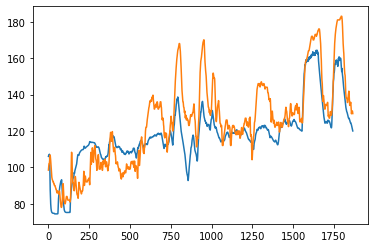

0-TS:(11.338335, 11.933709)
best val epoch: 1
[1/80]: loss_train: 20.578 loss_val 20.744 loss_ts 17.785
best val epoch: 2
[2/80]: loss_train: 18.766 loss_val 18.798 loss_ts 15.263
best val epoch: 4
[4/80]: loss_train: 15.503 loss_val 16.752 loss_ts 12.850
best val epoch: 5
[5/80]: loss_train: 15.094 loss_val 15.567 loss_ts 10.592
best val epoch: 6
[6/80]: loss_train: 12.101 loss_val 11.526 loss_ts 9.897
best val epoch: 8
[8/80]: loss_train: 11.503 loss_val 11.256 loss_ts 10.310
best val epoch: 11
[11/80]: loss_train: 9.536 loss_val 10.177 loss_ts 11.361
best val epoch: 12
[12/80]: loss_train: 8.731 loss_val 9.654 loss_ts 10.872
best val epoch: 30
[30/80]: loss_train: 7.629 loss_val 9.235 loss_ts 8.357
best val epoch: 37
[37/80]: loss_train: 6.499 loss_val 8.026 loss_ts 8.192
Final: 8.192256927490234
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_s': 4, 'step_s': 2, 'ts_per_is': 12, 'ts_per_sample': 50, 'ts_sub': 1, 'batch

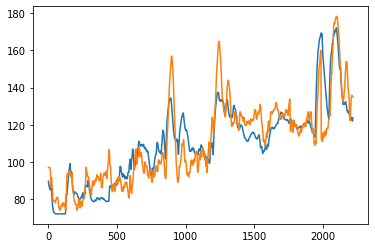

1-TS:(8.268852, 9.498335)
best val epoch: 1
[1/80]: loss_train: 21.783 loss_val 19.196 loss_ts 14.500
best val epoch: 2
[2/80]: loss_train: 19.476 loss_val 17.740 loss_ts 12.608
best val epoch: 3
[3/80]: loss_train: 18.035 loss_val 16.467 loss_ts 12.623
best val epoch: 4
[4/80]: loss_train: 13.743 loss_val 14.733 loss_ts 13.685
best val epoch: 5
[5/80]: loss_train: 14.252 loss_val 13.781 loss_ts 13.985
best val epoch: 6
[6/80]: loss_train: 11.925 loss_val 12.575 loss_ts 12.036
best val epoch: 9
[9/80]: loss_train: 13.089 loss_val 12.270 loss_ts 15.137
best val epoch: 11
[11/80]: loss_train: 11.727 loss_val 11.660 loss_ts 14.121
best val epoch: 12
[12/80]: loss_train: 9.313 loss_val 10.478 loss_ts 12.801
best val epoch: 14
[14/80]: loss_train: 10.783 loss_val 9.990 loss_ts 17.398
best val epoch: 18
[18/80]: loss_train: 8.400 loss_val 8.816 loss_ts 12.589
best val epoch: 20
[20/80]: loss_train: 6.973 loss_val 8.727 loss_ts 12.093
best val epoch: 23
[23/80]: loss_train: 7.434 loss_val 8.4

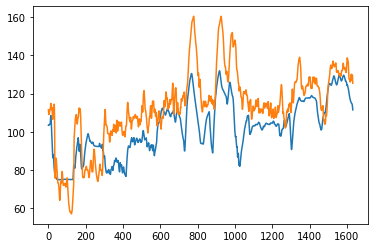

3-TS:(13.482339, 13.908343)
best val epoch: 1
[1/80]: loss_train: 18.488 loss_val 18.121 loss_ts 17.772
best val epoch: 3
[3/80]: loss_train: 15.720 loss_val 14.401 loss_ts 15.639
best val epoch: 6
[6/80]: loss_train: 14.574 loss_val 14.293 loss_ts 14.852
best val epoch: 9
[9/80]: loss_train: 13.575 loss_val 13.193 loss_ts 11.938
best val epoch: 13
[13/80]: loss_train: 12.137 loss_val 12.645 loss_ts 13.503
best val epoch: 17
[17/80]: loss_train: 10.723 loss_val 11.668 loss_ts 13.158
best val epoch: 19
[19/80]: loss_train: 10.459 loss_val 11.473 loss_ts 11.767
best val epoch: 24
[24/80]: loss_train: 9.694 loss_val 11.025 loss_ts 12.019
best val epoch: 31
[31/80]: loss_train: 8.708 loss_val 9.782 loss_ts 12.026
best val epoch: 35
[35/80]: loss_train: 8.348 loss_val 9.568 loss_ts 12.092
best val epoch: 51
[51/80]: loss_train: 7.807 loss_val 7.614 loss_ts 14.237
Final: 14.236930847167969
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40},

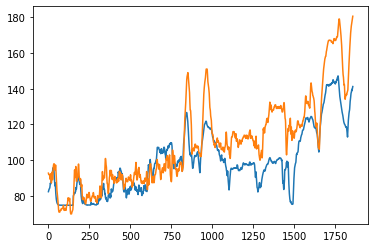

4-TS:(12.266781, 12.903064)
best val epoch: 1
[1/80]: loss_train: 19.367 loss_val 22.118 loss_ts 21.283
best val epoch: 2
[2/80]: loss_train: 15.281 loss_val 18.926 loss_ts 18.751
best val epoch: 3
[3/80]: loss_train: 14.353 loss_val 15.883 loss_ts 15.269
best val epoch: 7
[7/80]: loss_train: 12.055 loss_val 12.512 loss_ts 15.045
best val epoch: 11
[11/80]: loss_train: 10.395 loss_val 12.012 loss_ts 15.071
best val epoch: 12
[12/80]: loss_train: 9.917 loss_val 11.157 loss_ts 12.890
best val epoch: 22
[22/80]: loss_train: 8.505 loss_val 9.176 loss_ts 12.576
best val epoch: 24
[24/80]: loss_train: 8.335 loss_val 9.112 loss_ts 15.583
best val epoch: 29
[29/80]: loss_train: 7.123 loss_val 8.079 loss_ts 12.575
best val epoch: 38
[38/80]: loss_train: 6.291 loss_val 7.001 loss_ts 13.424
best val epoch: 51
[51/80]: loss_train: 5.981 loss_val 6.852 loss_ts 12.896
best val epoch: 73
[73/80]: loss_train: 6.888 loss_val 6.718 loss_ts 10.902
Final: 10.9017333984375
{'net_args': {'dropout_rate': 0.1

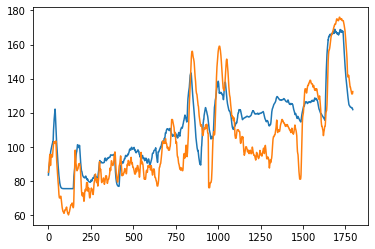

5-TS:(12.073733, 12.497965)
best val epoch: 1
[1/80]: loss_train: 19.557 loss_val 17.454 loss_ts 21.920
best val epoch: 2
[2/80]: loss_train: 17.623 loss_val 15.884 loss_ts 20.225
best val epoch: 3
[3/80]: loss_train: 13.965 loss_val 12.892 loss_ts 15.905
best val epoch: 5
[5/80]: loss_train: 13.610 loss_val 12.653 loss_ts 15.148
best val epoch: 7
[7/80]: loss_train: 11.750 loss_val 12.093 loss_ts 10.645
best val epoch: 9
[9/80]: loss_train: 11.472 loss_val 11.804 loss_ts 11.846
best val epoch: 10
[10/80]: loss_train: 9.908 loss_val 9.706 loss_ts 12.609
best val epoch: 11
[11/80]: loss_train: 9.267 loss_val 9.213 loss_ts 12.736
best val epoch: 14
[14/80]: loss_train: 8.988 loss_val 9.062 loss_ts 15.921
best val epoch: 17
[17/80]: loss_train: 7.325 loss_val 8.951 loss_ts 23.172
best val epoch: 22
[22/80]: loss_train: 8.252 loss_val 8.299 loss_ts 14.396
best val epoch: 26
[26/80]: loss_train: 6.993 loss_val 8.133 loss_ts 21.395
best val epoch: 28
[28/80]: loss_train: 7.740 loss_val 7.579

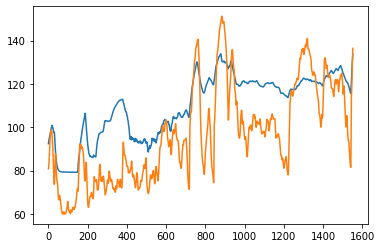

6-TS:(16.0181, 16.453794)
best val epoch: 1
[1/80]: loss_train: 20.467 loss_val 17.659 loss_ts 24.605
best val epoch: 2
[2/80]: loss_train: 20.749 loss_val 17.350 loss_ts 25.647
best val epoch: 3
[3/80]: loss_train: 17.640 loss_val 14.757 loss_ts 22.046
best val epoch: 5
[5/80]: loss_train: 15.161 loss_val 13.220 loss_ts 19.738
best val epoch: 11
[11/80]: loss_train: 14.144 loss_val 12.395 loss_ts 21.858
best val epoch: 12
[12/80]: loss_train: 13.697 loss_val 11.917 loss_ts 19.180
best val epoch: 16
[16/80]: loss_train: 13.219 loss_val 11.672 loss_ts 22.339
best val epoch: 19
[19/80]: loss_train: 11.831 loss_val 10.626 loss_ts 23.628
best val epoch: 25
[25/80]: loss_train: 12.592 loss_val 10.613 loss_ts 19.922
best val epoch: 29
[29/80]: loss_train: 9.751 loss_val 8.861 loss_ts 21.087
best val epoch: 38
[38/80]: loss_train: 10.184 loss_val 8.849 loss_ts 22.874
best val epoch: 39
[39/80]: loss_train: 9.453 loss_val 7.731 loss_ts 23.249
best val epoch: 80
[80/80]: loss_train: 7.853 loss_

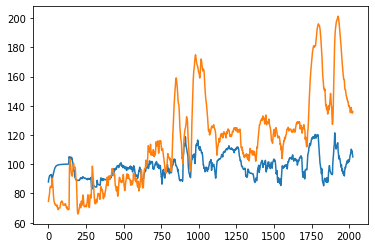

7-TS:(24.201914, 24.907347)
best val epoch: 1
[1/80]: loss_train: 18.744 loss_val 16.803 loss_ts 18.270
best val epoch: 2
[2/80]: loss_train: 16.158 loss_val 14.354 loss_ts 24.211
best val epoch: 3
[3/80]: loss_train: 15.382 loss_val 13.362 loss_ts 19.818
best val epoch: 5
[5/80]: loss_train: 12.288 loss_val 11.909 loss_ts 18.970
best val epoch: 10
[10/80]: loss_train: 10.651 loss_val 11.735 loss_ts 18.165
best val epoch: 13
[13/80]: loss_train: 9.685 loss_val 11.223 loss_ts 17.059
best val epoch: 15
[15/80]: loss_train: 10.969 loss_val 10.897 loss_ts 19.919
best val epoch: 20
[20/80]: loss_train: 9.580 loss_val 10.861 loss_ts 18.549
best val epoch: 21
[21/80]: loss_train: 8.723 loss_val 10.476 loss_ts 18.092
best val epoch: 23
[23/80]: loss_train: 7.986 loss_val 9.054 loss_ts 14.360
best val epoch: 25
[25/80]: loss_train: 8.090 loss_val 8.888 loss_ts 14.114
best val epoch: 27
[27/80]: loss_train: 6.819 loss_val 8.626 loss_ts 14.552
best val epoch: 43
[43/80]: loss_train: 6.066 loss_va

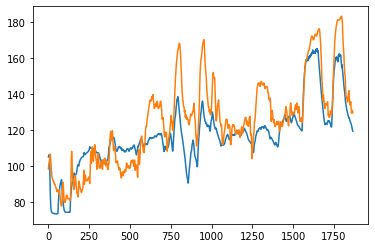

0-TS:(11.366884, 12.311529)
best val epoch: 1
[1/80]: loss_train: 20.354 loss_val 17.182 loss_ts 21.248
best val epoch: 2
[2/80]: loss_train: 17.490 loss_val 14.635 loss_ts 19.265
best val epoch: 3
[3/80]: loss_train: 14.042 loss_val 12.223 loss_ts 14.082
best val epoch: 4
[4/80]: loss_train: 13.238 loss_val 11.893 loss_ts 14.782
best val epoch: 11
[11/80]: loss_train: 12.636 loss_val 11.479 loss_ts 17.275
best val epoch: 13
[13/80]: loss_train: 9.942 loss_val 10.972 loss_ts 15.481
best val epoch: 15
[15/80]: loss_train: 9.225 loss_val 9.707 loss_ts 12.310
best val epoch: 17
[17/80]: loss_train: 8.142 loss_val 8.884 loss_ts 12.772
best val epoch: 25
[25/80]: loss_train: 8.968 loss_val 8.327 loss_ts 13.313
best val epoch: 28
[28/80]: loss_train: 7.173 loss_val 7.161 loss_ts 8.308
best val epoch: 31
[31/80]: loss_train: 5.852 loss_val 6.475 loss_ts 7.486
best val epoch: 45
[45/80]: loss_train: 5.488 loss_val 6.362 loss_ts 10.334
Final: 10.334213256835938
{'net_args': {'dropout_rate': 0.1

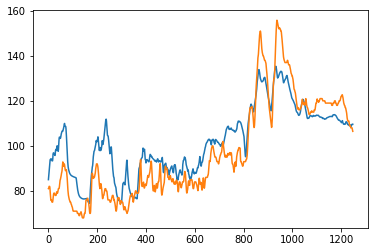

2-TS:(8.876229, 9.480692)
best val epoch: 1
[1/80]: loss_train: 19.240 loss_val 17.478 loss_ts 14.004
best val epoch: 4
[4/80]: loss_train: 14.882 loss_val 13.350 loss_ts 13.330
best val epoch: 7
[7/80]: loss_train: 12.880 loss_val 12.847 loss_ts 11.573
best val epoch: 12
[12/80]: loss_train: 10.786 loss_val 12.758 loss_ts 14.599
best val epoch: 14
[14/80]: loss_train: 10.573 loss_val 11.822 loss_ts 16.417
best val epoch: 15
[15/80]: loss_train: 10.637 loss_val 11.335 loss_ts 15.655
best val epoch: 16
[16/80]: loss_train: 9.076 loss_val 10.123 loss_ts 13.619
best val epoch: 18
[18/80]: loss_train: 9.037 loss_val 8.956 loss_ts 11.677
best val epoch: 29
[29/80]: loss_train: 8.115 loss_val 8.954 loss_ts 15.912
best val epoch: 30
[30/80]: loss_train: 7.584 loss_val 8.223 loss_ts 15.198
best val epoch: 34
[34/80]: loss_train: 7.266 loss_val 8.186 loss_ts 15.834
best val epoch: 35
[35/80]: loss_train: 7.252 loss_val 7.762 loss_ts 14.016
best val epoch: 38
[38/80]: loss_train: 6.695 loss_val 

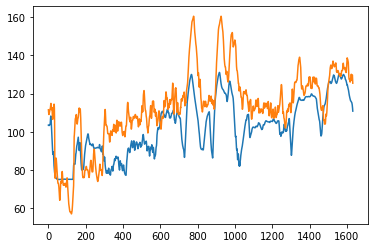

3-TS:(13.709922, 14.081988)
best val epoch: 3
[3/80]: loss_train: 18.494 loss_val 18.816 loss_ts 19.675
best val epoch: 4
[4/80]: loss_train: 19.307 loss_val 18.034 loss_ts 17.144
best val epoch: 5
[5/80]: loss_train: 17.354 loss_val 16.486 loss_ts 15.542
best val epoch: 6
[6/80]: loss_train: 14.288 loss_val 14.576 loss_ts 15.289
best val epoch: 7
[7/80]: loss_train: 14.203 loss_val 13.696 loss_ts 13.594
best val epoch: 10
[10/80]: loss_train: 13.203 loss_val 13.286 loss_ts 15.757
best val epoch: 12
[12/80]: loss_train: 12.345 loss_val 12.967 loss_ts 13.360
best val epoch: 13
[13/80]: loss_train: 12.618 loss_val 12.785 loss_ts 12.562
best val epoch: 15
[15/80]: loss_train: 11.913 loss_val 12.627 loss_ts 14.713
best val epoch: 17
[17/80]: loss_train: 11.620 loss_val 12.068 loss_ts 13.014
best val epoch: 18
[18/80]: loss_train: 10.463 loss_val 11.917 loss_ts 10.328
best val epoch: 20
[20/80]: loss_train: 10.114 loss_val 11.631 loss_ts 16.196
best val epoch: 21
[21/80]: loss_train: 9.279 

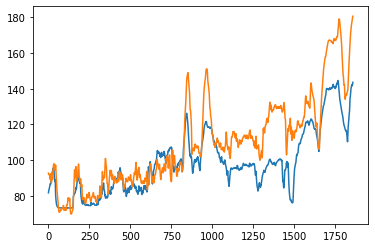

4-TS:(12.463853, 13.094996)
best val epoch: 1
[1/80]: loss_train: 20.001 loss_val 20.502 loss_ts 21.568
best val epoch: 2
[2/80]: loss_train: 20.076 loss_val 20.103 loss_ts 20.615
best val epoch: 3
[3/80]: loss_train: 16.709 loss_val 17.478 loss_ts 19.266
best val epoch: 4
[4/80]: loss_train: 14.743 loss_val 13.788 loss_ts 15.138
best val epoch: 5
[5/80]: loss_train: 13.154 loss_val 11.913 loss_ts 15.499
best val epoch: 11
[11/80]: loss_train: 11.935 loss_val 11.529 loss_ts 14.694
best val epoch: 13
[13/80]: loss_train: 12.304 loss_val 11.469 loss_ts 18.180
best val epoch: 14
[14/80]: loss_train: 11.772 loss_val 10.940 loss_ts 15.142
best val epoch: 18
[18/80]: loss_train: 10.987 loss_val 10.840 loss_ts 15.329
best val epoch: 19
[19/80]: loss_train: 10.289 loss_val 9.812 loss_ts 15.462
best val epoch: 20
[20/80]: loss_train: 9.840 loss_val 8.040 loss_ts 15.287
best val epoch: 40
[40/80]: loss_train: 6.161 loss_val 7.051 loss_ts 13.423
best val epoch: 67
[67/80]: loss_train: 6.230 loss_

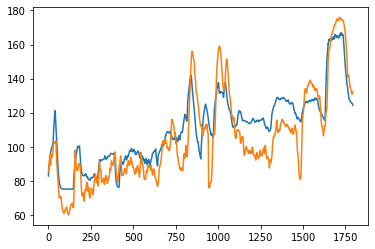

5-TS:(11.464691, 11.846864)
best val epoch: 1
[1/80]: loss_train: 18.564 loss_val 20.562 loss_ts 20.922
best val epoch: 3
[3/80]: loss_train: 14.011 loss_val 19.333 loss_ts 20.255
best val epoch: 4
[4/80]: loss_train: 14.860 loss_val 17.172 loss_ts 14.938
best val epoch: 5
[5/80]: loss_train: 13.838 loss_val 16.909 loss_ts 18.520
best val epoch: 6
[6/80]: loss_train: 13.770 loss_val 16.669 loss_ts 15.387
best val epoch: 7
[7/80]: loss_train: 12.000 loss_val 15.415 loss_ts 14.327
best val epoch: 10
[10/80]: loss_train: 14.557 loss_val 14.865 loss_ts 9.785
best val epoch: 11
[11/80]: loss_train: 10.255 loss_val 13.736 loss_ts 15.322
best val epoch: 14
[14/80]: loss_train: 9.500 loss_val 12.215 loss_ts 16.610
best val epoch: 17
[17/80]: loss_train: 7.703 loss_val 11.211 loss_ts 15.774
best val epoch: 22
[22/80]: loss_train: 7.246 loss_val 10.359 loss_ts 16.048
best val epoch: 24
[24/80]: loss_train: 8.379 loss_val 9.865 loss_ts 11.947
best val epoch: 26
[26/80]: loss_train: 6.866 loss_val

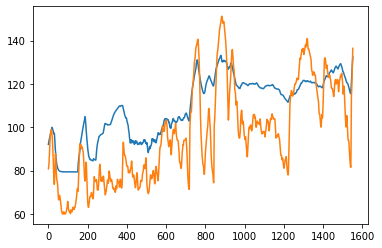

6-TS:(15.474988, 15.898062)
best val epoch: 3
[3/80]: loss_train: 18.175 loss_val 18.917 loss_ts 23.767
best val epoch: 4
[4/80]: loss_train: 17.408 loss_val 17.649 loss_ts 24.929
best val epoch: 5
[5/80]: loss_train: 16.424 loss_val 16.518 loss_ts 30.110
best val epoch: 8
[8/80]: loss_train: 15.122 loss_val 15.573 loss_ts 28.256
best val epoch: 9
[9/80]: loss_train: 13.862 loss_val 13.614 loss_ts 24.192
best val epoch: 16
[16/80]: loss_train: 13.080 loss_val 13.613 loss_ts 25.723
best val epoch: 18
[18/80]: loss_train: 13.287 loss_val 13.102 loss_ts 28.068
best val epoch: 19
[19/80]: loss_train: 11.928 loss_val 12.209 loss_ts 31.725
best val epoch: 24
[24/80]: loss_train: 12.144 loss_val 11.839 loss_ts 32.443
best val epoch: 38
[38/80]: loss_train: 9.653 loss_val 10.299 loss_ts 27.043
best val epoch: 42
[42/80]: loss_train: 10.123 loss_val 9.802 loss_ts 21.199
best val epoch: 51
[51/80]: loss_train: 10.513 loss_val 9.610 loss_ts 24.475
best val epoch: 53
[53/80]: loss_train: 9.752 los

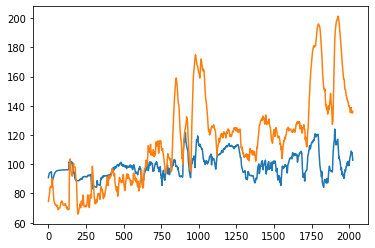

7-TS:(23.81712, 24.543333)
best val epoch: 1
[1/80]: loss_train: 19.801 loss_val 18.354 loss_ts 16.134
best val epoch: 2
[2/80]: loss_train: 17.023 loss_val 15.621 loss_ts 15.446
best val epoch: 4
[4/80]: loss_train: 12.904 loss_val 12.026 loss_ts 10.756
best val epoch: 8
[8/80]: loss_train: 12.145 loss_val 11.382 loss_ts 9.850
best val epoch: 9
[9/80]: loss_train: 11.683 loss_val 10.932 loss_ts 9.548
best val epoch: 10
[10/80]: loss_train: 10.615 loss_val 10.795 loss_ts 11.139
best val epoch: 12
[12/80]: loss_train: 9.564 loss_val 9.991 loss_ts 10.147
best val epoch: 14
[14/80]: loss_train: 9.803 loss_val 9.323 loss_ts 9.879
best val epoch: 17
[17/80]: loss_train: 7.956 loss_val 8.974 loss_ts 13.534
best val epoch: 18
[18/80]: loss_train: 7.997 loss_val 8.073 loss_ts 8.872
best val epoch: 22
[22/80]: loss_train: 7.682 loss_val 8.050 loss_ts 9.706
best val epoch: 27
[27/80]: loss_train: 5.989 loss_val 7.012 loss_ts 8.741
best val epoch: 34
[34/80]: loss_train: 5.797 loss_val 6.525 loss

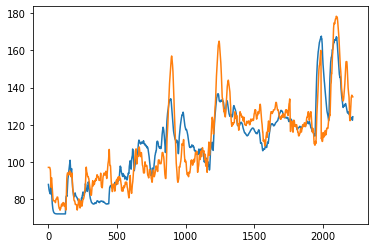

1-TS:(8.367862, 9.589789)
best val epoch: 1
[1/80]: loss_train: 19.426 loss_val 22.630 loss_ts 22.235
best val epoch: 2
[2/80]: loss_train: 18.637 loss_val 22.215 loss_ts 21.692
best val epoch: 5
[5/80]: loss_train: 16.732 loss_val 20.301 loss_ts 21.925
best val epoch: 6
[6/80]: loss_train: 15.216 loss_val 18.234 loss_ts 19.459
best val epoch: 7
[7/80]: loss_train: 13.635 loss_val 15.655 loss_ts 15.467
best val epoch: 8
[8/80]: loss_train: 13.026 loss_val 15.059 loss_ts 14.171
best val epoch: 9
[9/80]: loss_train: 11.925 loss_val 13.680 loss_ts 14.642
best val epoch: 14
[14/80]: loss_train: 10.941 loss_val 13.578 loss_ts 11.770
best val epoch: 15
[15/80]: loss_train: 10.389 loss_val 12.734 loss_ts 14.427
best val epoch: 16
[16/80]: loss_train: 9.792 loss_val 12.364 loss_ts 15.263
best val epoch: 17
[17/80]: loss_train: 9.037 loss_val 11.466 loss_ts 15.215
best val epoch: 19
[19/80]: loss_train: 8.796 loss_val 11.292 loss_ts 23.004
best val epoch: 24
[24/80]: loss_train: 7.461 loss_val 

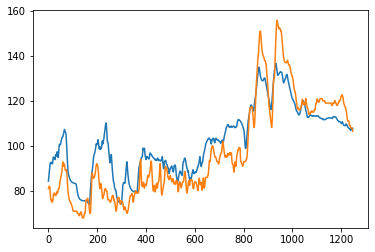

2-TS:(8.764793, 9.347056)
best val epoch: 1
[1/80]: loss_train: 17.812 loss_val 19.198 loss_ts 12.516
best val epoch: 3
[3/80]: loss_train: 18.417 loss_val 18.368 loss_ts 17.890
best val epoch: 4
[4/80]: loss_train: 15.908 loss_val 16.658 loss_ts 11.699
best val epoch: 5
[5/80]: loss_train: 16.228 loss_val 15.567 loss_ts 16.049
best val epoch: 6
[6/80]: loss_train: 13.234 loss_val 13.158 loss_ts 12.985
best val epoch: 10
[10/80]: loss_train: 12.252 loss_val 12.761 loss_ts 14.179
best val epoch: 13
[13/80]: loss_train: 10.182 loss_val 11.025 loss_ts 15.884
best val epoch: 16
[16/80]: loss_train: 8.482 loss_val 8.415 loss_ts 11.471
best val epoch: 32
[32/80]: loss_train: 7.131 loss_val 7.430 loss_ts 14.406
Final: 14.405884742736816
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_s': 4, 'step_s': 2, 'ts_per_is': 12, 'ts_per_sample': 50, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.0045000000000000005} 14.4058

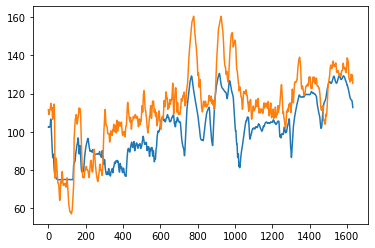

3-TS:(13.585852, 14.146768)
best val epoch: 1
[1/80]: loss_train: 19.320 loss_val 22.366 loss_ts 18.666
best val epoch: 2
[2/80]: loss_train: 17.079 loss_val 20.154 loss_ts 16.166
best val epoch: 3
[3/80]: loss_train: 15.474 loss_val 18.769 loss_ts 15.456
best val epoch: 4
[4/80]: loss_train: 14.781 loss_val 16.042 loss_ts 12.349
best val epoch: 8
[8/80]: loss_train: 13.438 loss_val 16.023 loss_ts 12.309
best val epoch: 9
[9/80]: loss_train: 12.669 loss_val 15.787 loss_ts 19.819
best val epoch: 10
[10/80]: loss_train: 12.674 loss_val 14.588 loss_ts 10.785
best val epoch: 13
[13/80]: loss_train: 11.091 loss_val 14.132 loss_ts 17.068
best val epoch: 18
[18/80]: loss_train: 10.621 loss_val 13.958 loss_ts 14.763
best val epoch: 19
[19/80]: loss_train: 10.450 loss_val 13.493 loss_ts 14.227
best val epoch: 20
[20/80]: loss_train: 9.259 loss_val 12.807 loss_ts 13.801
best val epoch: 23
[23/80]: loss_train: 10.216 loss_val 12.292 loss_ts 10.979
best val epoch: 26
[26/80]: loss_train: 9.250 los

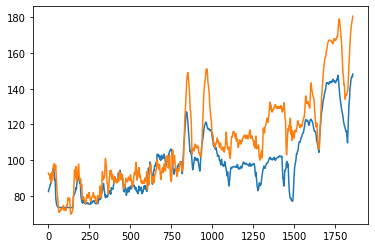

4-TS:(11.850426, 12.488326)
best val epoch: 1
[1/80]: loss_train: 19.618 loss_val 19.309 loss_ts 21.341
best val epoch: 6
[6/80]: loss_train: 17.805 loss_val 17.600 loss_ts 20.770
best val epoch: 7
[7/80]: loss_train: 16.237 loss_val 15.485 loss_ts 19.486
best val epoch: 8
[8/80]: loss_train: 15.810 loss_val 14.826 loss_ts 15.151
best val epoch: 9
[9/80]: loss_train: 13.066 loss_val 11.732 loss_ts 16.168
best val epoch: 13
[13/80]: loss_train: 11.941 loss_val 11.004 loss_ts 13.254
best val epoch: 19
[19/80]: loss_train: 10.767 loss_val 9.179 loss_ts 13.754
best val epoch: 26
[26/80]: loss_train: 10.930 loss_val 8.984 loss_ts 12.834
best val epoch: 30
[30/80]: loss_train: 9.650 loss_val 8.778 loss_ts 12.683
best val epoch: 33
[33/80]: loss_train: 7.633 loss_val 7.661 loss_ts 13.957
best val epoch: 58
[58/80]: loss_train: 7.323 loss_val 7.503 loss_ts 11.176
best val epoch: 71
[71/80]: loss_train: 6.811 loss_val 7.148 loss_ts 12.221
Final: 12.221200942993164
{'net_args': {'dropout_rate': 

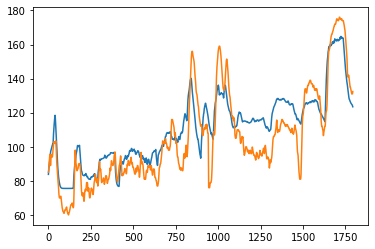

5-TS:(11.537604, 11.921731)
best val epoch: 1
[1/80]: loss_train: 20.748 loss_val 19.023 loss_ts 21.838
best val epoch: 2
[2/80]: loss_train: 18.479 loss_val 16.379 loss_ts 23.055
best val epoch: 4
[4/80]: loss_train: 14.469 loss_val 14.679 loss_ts 18.680
best val epoch: 7
[7/80]: loss_train: 12.628 loss_val 14.023 loss_ts 13.042
best val epoch: 10
[10/80]: loss_train: 11.107 loss_val 11.949 loss_ts 12.849
best val epoch: 17
[17/80]: loss_train: 10.607 loss_val 11.776 loss_ts 14.918
best val epoch: 19
[19/80]: loss_train: 9.711 loss_val 11.029 loss_ts 13.816
best val epoch: 23
[23/80]: loss_train: 8.143 loss_val 10.330 loss_ts 10.251
best val epoch: 28
[28/80]: loss_train: 7.542 loss_val 9.622 loss_ts 11.472
best val epoch: 31
[31/80]: loss_train: 6.930 loss_val 8.232 loss_ts 12.463
best val epoch: 35
[35/80]: loss_train: 6.481 loss_val 7.543 loss_ts 12.229
best val epoch: 43
[43/80]: loss_train: 5.147 loss_val 6.822 loss_ts 12.236
Final: 12.236265182495117
{'net_args': {'dropout_rate'

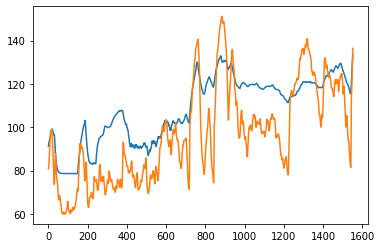

6-TS:(14.884553, 15.287762)
best val epoch: 1
[1/80]: loss_train: 18.934 loss_val 19.577 loss_ts 23.733
best val epoch: 5
[5/80]: loss_train: 17.939 loss_val 18.170 loss_ts 23.666
best val epoch: 6
[6/80]: loss_train: 15.831 loss_val 15.881 loss_ts 22.402
best val epoch: 8
[8/80]: loss_train: 13.929 loss_val 13.852 loss_ts 21.687
best val epoch: 11
[11/80]: loss_train: 12.795 loss_val 12.695 loss_ts 24.251
best val epoch: 14
[14/80]: loss_train: 12.317 loss_val 12.489 loss_ts 24.515
best val epoch: 15
[15/80]: loss_train: 12.047 loss_val 12.404 loss_ts 24.140
best val epoch: 29
[29/80]: loss_train: 11.442 loss_val 12.379 loss_ts 17.788
best val epoch: 35
[35/80]: loss_train: 9.615 loss_val 11.716 loss_ts 21.558
best val epoch: 36
[36/80]: loss_train: 9.672 loss_val 11.430 loss_ts 20.671
best val epoch: 38
[38/80]: loss_train: 8.993 loss_val 11.143 loss_ts 20.568
best val epoch: 44
[44/80]: loss_train: 9.196 loss_val 10.496 loss_ts 24.589
best val epoch: 46
[46/80]: loss_train: 8.513 lo

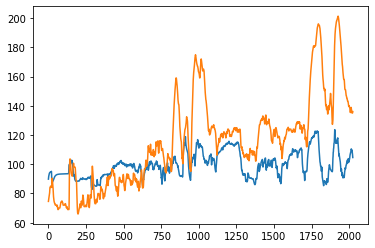

7-TS:(23.209776, 23.862755)
best val epoch: 1
[1/80]: loss_train: 17.819 loss_val 17.676 loss_ts 16.997
best val epoch: 3
[3/80]: loss_train: 16.788 loss_val 14.883 loss_ts 23.520
best val epoch: 4
[4/80]: loss_train: 13.109 loss_val 12.805 loss_ts 16.636
best val epoch: 8
[8/80]: loss_train: 12.456 loss_val 12.529 loss_ts 17.677
best val epoch: 16
[16/80]: loss_train: 11.539 loss_val 12.258 loss_ts 16.668
best val epoch: 20
[20/80]: loss_train: 9.768 loss_val 11.245 loss_ts 16.023
best val epoch: 22
[22/80]: loss_train: 8.797 loss_val 11.049 loss_ts 16.159
best val epoch: 24
[24/80]: loss_train: 7.740 loss_val 10.092 loss_ts 14.072
best val epoch: 34
[34/80]: loss_train: 7.822 loss_val 10.064 loss_ts 11.804
best val epoch: 39
[39/80]: loss_train: 7.306 loss_val 9.221 loss_ts 12.618
best val epoch: 41
[41/80]: loss_train: 7.283 loss_val 8.991 loss_ts 13.042
best val epoch: 47
[47/80]: loss_train: 6.775 loss_val 8.829 loss_ts 14.423
best val epoch: 50
[50/80]: loss_train: 6.015 loss_val

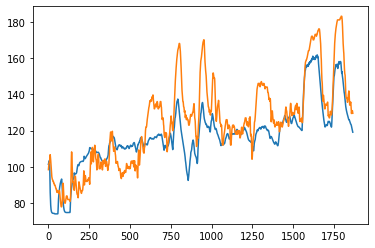

0-TS:(11.638829, 12.517926)
best val epoch: 2
[2/80]: loss_train: 20.761 loss_val 17.115 loss_ts 16.778
best val epoch: 3
[3/80]: loss_train: 18.489 loss_val 15.477 loss_ts 14.350
best val epoch: 4
[4/80]: loss_train: 17.311 loss_val 13.779 loss_ts 12.408
best val epoch: 5
[5/80]: loss_train: 15.932 loss_val 12.047 loss_ts 11.272
best val epoch: 6
[6/80]: loss_train: 12.781 loss_val 11.359 loss_ts 11.912
best val epoch: 7
[7/80]: loss_train: 15.634 loss_val 11.076 loss_ts 13.802
best val epoch: 8
[8/80]: loss_train: 12.640 loss_val 9.362 loss_ts 11.011
best val epoch: 11
[11/80]: loss_train: 10.458 loss_val 8.029 loss_ts 10.221
best val epoch: 13
[13/80]: loss_train: 9.315 loss_val 7.521 loss_ts 11.646
best val epoch: 21
[21/80]: loss_train: 7.320 loss_val 7.269 loss_ts 9.552
best val epoch: 34
[34/80]: loss_train: 6.916 loss_val 7.253 loss_ts 9.516
best val epoch: 40
[40/80]: loss_train: 5.814 loss_val 6.939 loss_ts 9.638
best val epoch: 63
[63/80]: loss_train: 4.749 loss_val 6.688 lo

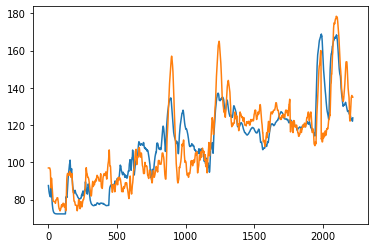

1-TS:(8.445763, 9.558784)
best val epoch: 2
[2/80]: loss_train: 19.024 loss_val 21.422 loss_ts 22.379
best val epoch: 4
[4/80]: loss_train: 18.020 loss_val 20.044 loss_ts 21.152
best val epoch: 5
[5/80]: loss_train: 16.817 loss_val 18.463 loss_ts 19.632
best val epoch: 6
[6/80]: loss_train: 13.044 loss_val 15.733 loss_ts 16.657
best val epoch: 9
[9/80]: loss_train: 12.502 loss_val 14.369 loss_ts 16.247
best val epoch: 11
[11/80]: loss_train: 12.356 loss_val 13.691 loss_ts 15.950
best val epoch: 13
[13/80]: loss_train: 9.893 loss_val 12.071 loss_ts 15.202
best val epoch: 15
[15/80]: loss_train: 9.221 loss_val 9.656 loss_ts 11.889
best val epoch: 18
[18/80]: loss_train: 9.488 loss_val 9.617 loss_ts 7.440
best val epoch: 19
[19/80]: loss_train: 9.268 loss_val 8.891 loss_ts 7.744
best val epoch: 23
[23/80]: loss_train: 8.786 loss_val 8.701 loss_ts 6.836
best val epoch: 26
[26/80]: loss_train: 8.554 loss_val 8.319 loss_ts 8.397
best val epoch: 36
[36/80]: loss_train: 7.451 loss_val 8.109 lo

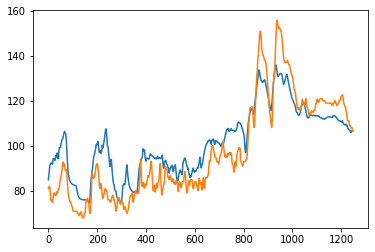

2-TS:(8.490721, 9.044339)
best val epoch: 1
[1/80]: loss_train: 21.007 loss_val 18.436 loss_ts 13.915
best val epoch: 2
[2/80]: loss_train: 20.382 loss_val 17.265 loss_ts 15.099
best val epoch: 3
[3/80]: loss_train: 16.247 loss_val 12.771 loss_ts 12.671
best val epoch: 4
[4/80]: loss_train: 13.438 loss_val 10.629 loss_ts 12.619
best val epoch: 7
[7/80]: loss_train: 12.126 loss_val 10.217 loss_ts 13.990
best val epoch: 8
[8/80]: loss_train: 13.019 loss_val 10.151 loss_ts 16.178
best val epoch: 10
[10/80]: loss_train: 12.463 loss_val 10.077 loss_ts 20.664
best val epoch: 13
[13/80]: loss_train: 9.548 loss_val 8.831 loss_ts 14.313
best val epoch: 16
[16/80]: loss_train: 8.321 loss_val 7.294 loss_ts 13.559
best val epoch: 22
[22/80]: loss_train: 6.816 loss_val 7.036 loss_ts 13.803
best val epoch: 27
[27/80]: loss_train: 6.900 loss_val 6.913 loss_ts 14.715
best val epoch: 29
[29/80]: loss_train: 7.499 loss_val 6.727 loss_ts 14.520
best val epoch: 69
[69/80]: loss_train: 6.089 loss_val 6.286

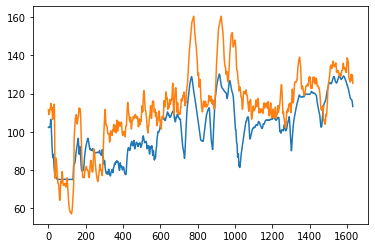

3-TS:(13.287849, 13.905321)
best val epoch: 1
[1/80]: loss_train: 21.231 loss_val 19.809 loss_ts 19.691
best val epoch: 2
[2/80]: loss_train: 21.236 loss_val 19.640 loss_ts 19.437
best val epoch: 3
[3/80]: loss_train: 17.653 loss_val 17.842 loss_ts 17.178
best val epoch: 4
[4/80]: loss_train: 15.410 loss_val 16.194 loss_ts 17.313
best val epoch: 6
[6/80]: loss_train: 14.925 loss_val 15.223 loss_ts 15.622
best val epoch: 7
[7/80]: loss_train: 13.711 loss_val 14.261 loss_ts 15.997
best val epoch: 8
[8/80]: loss_train: 12.887 loss_val 12.786 loss_ts 13.415
best val epoch: 11
[11/80]: loss_train: 11.289 loss_val 12.121 loss_ts 11.253
best val epoch: 25
[25/80]: loss_train: 10.592 loss_val 11.458 loss_ts 12.341
best val epoch: 27
[27/80]: loss_train: 9.926 loss_val 11.361 loss_ts 11.032
best val epoch: 29
[29/80]: loss_train: 9.889 loss_val 10.723 loss_ts 9.752
best val epoch: 35
[35/80]: loss_train: 8.633 loss_val 9.634 loss_ts 8.552
best val epoch: 43
[43/80]: loss_train: 8.735 loss_val 9

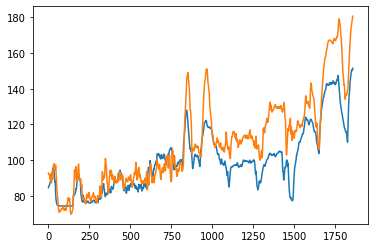

4-TS:(11.29016, 12.09263)
best val epoch: 1
[1/80]: loss_train: 20.186 loss_val 17.172 loss_ts 21.853
best val epoch: 2
[2/80]: loss_train: 20.631 loss_val 17.147 loss_ts 20.352
best val epoch: 3
[3/80]: loss_train: 19.546 loss_val 16.379 loss_ts 18.994
best val epoch: 4
[4/80]: loss_train: 15.835 loss_val 13.728 loss_ts 16.942
best val epoch: 5
[5/80]: loss_train: 16.465 loss_val 13.696 loss_ts 13.915
best val epoch: 6
[6/80]: loss_train: 14.362 loss_val 13.403 loss_ts 16.168
best val epoch: 8
[8/80]: loss_train: 13.254 loss_val 12.175 loss_ts 12.584
best val epoch: 9
[9/80]: loss_train: 13.522 loss_val 11.399 loss_ts 13.396
best val epoch: 11
[11/80]: loss_train: 11.359 loss_val 10.521 loss_ts 15.795
best val epoch: 15
[15/80]: loss_train: 9.399 loss_val 9.648 loss_ts 14.485
best val epoch: 21
[21/80]: loss_train: 9.529 loss_val 8.634 loss_ts 13.323
best val epoch: 22
[22/80]: loss_train: 8.797 loss_val 8.190 loss_ts 14.221
best val epoch: 25
[25/80]: loss_train: 8.290 loss_val 7.889

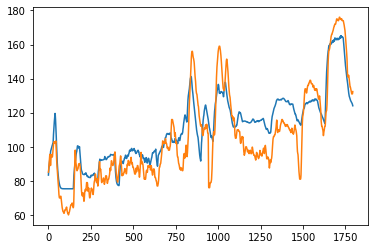

5-TS:(11.185749, 11.566855)
best val epoch: 1
[1/80]: loss_train: 19.745 loss_val 19.174 loss_ts 24.287
best val epoch: 2
[2/80]: loss_train: 19.265 loss_val 18.507 loss_ts 24.074
best val epoch: 4
[4/80]: loss_train: 15.974 loss_val 15.496 loss_ts 22.718
best val epoch: 5
[5/80]: loss_train: 12.634 loss_val 13.870 loss_ts 21.183
best val epoch: 7
[7/80]: loss_train: 12.376 loss_val 13.712 loss_ts 22.609
best val epoch: 8
[8/80]: loss_train: 10.980 loss_val 12.690 loss_ts 24.709
best val epoch: 56
[56/80]: loss_train: 10.283 loss_val 12.286 loss_ts 20.607
best val epoch: 68
[68/80]: loss_train: 10.562 loss_val 11.942 loss_ts 27.744
best val epoch: 70
[70/80]: loss_train: 10.200 loss_val 11.800 loss_ts 27.248
best val epoch: 72
[72/80]: loss_train: 9.807 loss_val 11.702 loss_ts 26.022
best val epoch: 74
[74/80]: loss_train: 9.919 loss_val 11.587 loss_ts 26.496
Final: 26.49590492248535
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40},

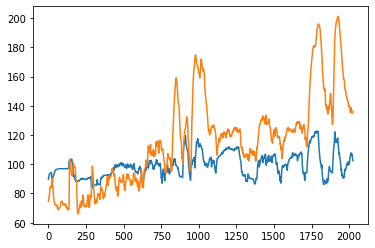

7-TS:(23.615612, 24.238918)
best val epoch: 1
[1/80]: loss_train: 20.330 loss_val 20.267 loss_ts 23.744
best val epoch: 2
[2/80]: loss_train: 20.340 loss_val 20.056 loss_ts 24.366
best val epoch: 3
[3/80]: loss_train: 20.392 loss_val 19.865 loss_ts 25.011
best val epoch: 5
[5/80]: loss_train: 19.727 loss_val 19.612 loss_ts 23.038
best val epoch: 6
[6/80]: loss_train: 18.548 loss_val 17.592 loss_ts 25.065
best val epoch: 8
[8/80]: loss_train: 16.202 loss_val 15.669 loss_ts 22.318
best val epoch: 9
[9/80]: loss_train: 14.903 loss_val 14.083 loss_ts 21.968
best val epoch: 10
[10/80]: loss_train: 13.768 loss_val 13.075 loss_ts 19.092
best val epoch: 11
[11/80]: loss_train: 13.481 loss_val 12.582 loss_ts 23.363
best val epoch: 13
[13/80]: loss_train: 12.736 loss_val 11.816 loss_ts 25.326
best val epoch: 20
[20/80]: loss_train: 11.676 loss_val 10.646 loss_ts 21.379
best val epoch: 28
[28/80]: loss_train: 11.441 loss_val 10.410 loss_ts 22.649
best val epoch: 30
[30/80]: loss_train: 11.155 los

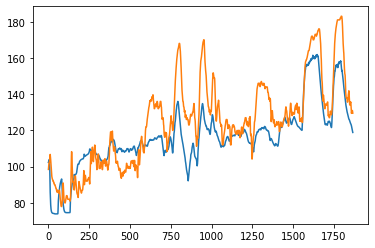

0-TS:(11.8656435, 12.840503)
best val epoch: 1
[1/80]: loss_train: 21.460 loss_val 16.246 loss_ts 17.476
best val epoch: 2
[2/80]: loss_train: 19.018 loss_val 15.431 loss_ts 14.196
best val epoch: 3
[3/80]: loss_train: 15.526 loss_val 14.132 loss_ts 12.462
best val epoch: 4
[4/80]: loss_train: 13.021 loss_val 11.487 loss_ts 10.856
best val epoch: 8
[8/80]: loss_train: 9.706 loss_val 10.854 loss_ts 11.437
best val epoch: 10
[10/80]: loss_train: 10.473 loss_val 9.853 loss_ts 9.486
best val epoch: 13
[13/80]: loss_train: 8.236 loss_val 9.324 loss_ts 11.255
best val epoch: 16
[16/80]: loss_train: 9.631 loss_val 9.126 loss_ts 9.252
best val epoch: 18
[18/80]: loss_train: 7.829 loss_val 8.251 loss_ts 9.625
best val epoch: 20
[20/80]: loss_train: 7.802 loss_val 7.710 loss_ts 9.089
best val epoch: 23
[23/80]: loss_train: 7.176 loss_val 7.382 loss_ts 8.673
best val epoch: 46
[46/80]: loss_train: 5.089 loss_val 6.943 loss_ts 9.285
Final: 9.285115242004395
{'net_args': {'dropout_rate': 0.15, 'lst

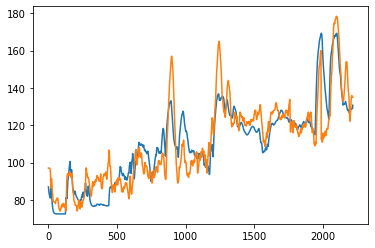

1-TS:(8.170008, 9.519688)
best val epoch: 1
[1/80]: loss_train: 19.216 loss_val 19.047 loss_ts 21.274
best val epoch: 2
[2/80]: loss_train: 16.951 loss_val 16.955 loss_ts 23.463
best val epoch: 4
[4/80]: loss_train: 12.808 loss_val 15.975 loss_ts 14.759
best val epoch: 7
[7/80]: loss_train: 12.608 loss_val 15.052 loss_ts 13.201
best val epoch: 9
[9/80]: loss_train: 11.612 loss_val 14.973 loss_ts 11.620
best val epoch: 10
[10/80]: loss_train: 10.290 loss_val 14.183 loss_ts 8.361
best val epoch: 11
[11/80]: loss_train: 9.260 loss_val 11.903 loss_ts 9.473
best val epoch: 16
[16/80]: loss_train: 7.901 loss_val 9.989 loss_ts 7.452
best val epoch: 20
[20/80]: loss_train: 6.761 loss_val 9.366 loss_ts 7.279
best val epoch: 28
[28/80]: loss_train: 6.192 loss_val 8.960 loss_ts 7.517
best val epoch: 42
[42/80]: loss_train: 4.842 loss_val 7.889 loss_ts 8.499
Final: 8.49856948852539
{'net_args': {'dropout_rate': 0.15, 'lstm_input': 128, 'lstm_size': 64, 'ts_h_size': 16, 'nattrs': 40}, 'period_s': 4

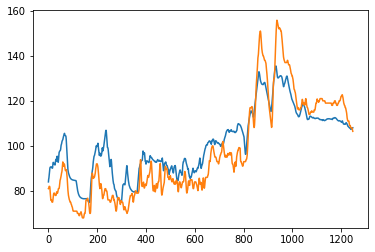

2-TS:(8.410333, 8.9663725)
best val epoch: 1
[1/80]: loss_train: 20.143 loss_val 21.290 loss_ts 15.865
best val epoch: 2
[2/80]: loss_train: 19.514 loss_val 20.474 loss_ts 13.406
best val epoch: 4
[4/80]: loss_train: 16.076 loss_val 17.253 loss_ts 11.071
best val epoch: 5
[5/80]: loss_train: 14.204 loss_val 15.713 loss_ts 12.237
best val epoch: 6
[6/80]: loss_train: 12.731 loss_val 15.144 loss_ts 15.282
best val epoch: 7
[7/80]: loss_train: 12.588 loss_val 14.834 loss_ts 11.550
best val epoch: 8
[8/80]: loss_train: 12.158 loss_val 14.157 loss_ts 11.508
best val epoch: 9
[9/80]: loss_train: 11.454 loss_val 14.000 loss_ts 15.858
best val epoch: 11
[11/80]: loss_train: 11.145 loss_val 13.580 loss_ts 16.246
best val epoch: 12
[12/80]: loss_train: 9.719 loss_val 12.075 loss_ts 13.835
best val epoch: 15
[15/80]: loss_train: 9.830 loss_val 11.356 loss_ts 19.070
best val epoch: 18
[18/80]: loss_train: 8.528 loss_val 10.492 loss_ts 18.572
best val epoch: 19
[19/80]: loss_train: 8.681 loss_val 1

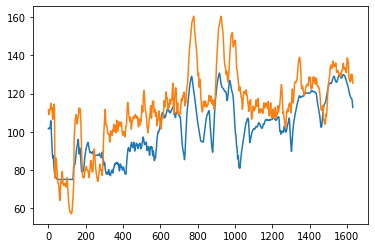

3-TS:(13.38444, 14.053137)
best val epoch: 1
[1/80]: loss_train: 19.769 loss_val 21.388 loss_ts 19.674
best val epoch: 2
[2/80]: loss_train: 18.651 loss_val 19.695 loss_ts 18.481
best val epoch: 3
[3/80]: loss_train: 18.257 loss_val 18.394 loss_ts 18.193
best val epoch: 4
[4/80]: loss_train: 14.907 loss_val 15.668 loss_ts 14.458
best val epoch: 6
[6/80]: loss_train: 12.285 loss_val 14.677 loss_ts 12.262
best val epoch: 9
[9/80]: loss_train: 12.489 loss_val 13.337 loss_ts 13.657
best val epoch: 12
[12/80]: loss_train: 12.679 loss_val 13.094 loss_ts 14.974
best val epoch: 14
[14/80]: loss_train: 11.870 loss_val 12.443 loss_ts 13.154
best val epoch: 16
[16/80]: loss_train: 10.406 loss_val 10.884 loss_ts 12.429
best val epoch: 26
[26/80]: loss_train: 7.934 loss_val 8.892 loss_ts 9.161
best val epoch: 28
[28/80]: loss_train: 8.746 loss_val 8.799 loss_ts 11.177
best val epoch: 40
[40/80]: loss_train: 8.621 loss_val 8.292 loss_ts 13.253
best val epoch: 41
[41/80]: loss_train: 8.210 loss_val 8

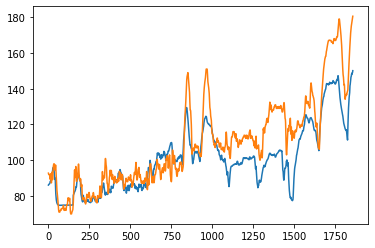

4-TS:(10.892273, 11.906092)
best val epoch: 1
[1/80]: loss_train: 18.577 loss_val 18.952 loss_ts 21.669
best val epoch: 2
[2/80]: loss_train: 19.820 loss_val 18.632 loss_ts 18.301
best val epoch: 3
[3/80]: loss_train: 18.900 loss_val 18.107 loss_ts 18.888
best val epoch: 4
[4/80]: loss_train: 17.207 loss_val 16.562 loss_ts 17.239
best val epoch: 5
[5/80]: loss_train: 13.540 loss_val 14.200 loss_ts 16.075
best val epoch: 6
[6/80]: loss_train: 13.084 loss_val 13.015 loss_ts 15.615
best val epoch: 8
[8/80]: loss_train: 12.545 loss_val 12.462 loss_ts 14.951
best val epoch: 9
[9/80]: loss_train: 11.569 loss_val 11.917 loss_ts 15.893
best val epoch: 17
[17/80]: loss_train: 10.464 loss_val 11.290 loss_ts 16.854
best val epoch: 18
[18/80]: loss_train: 9.552 loss_val 10.042 loss_ts 14.717
best val epoch: 29
[29/80]: loss_train: 8.677 loss_val 9.814 loss_ts 14.601
best val epoch: 32
[32/80]: loss_train: 7.635 loss_val 8.319 loss_ts 14.835
best val epoch: 44
[44/80]: loss_train: 6.447 loss_val 7.

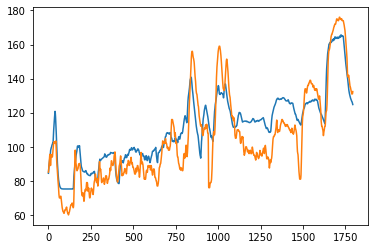

5-TS:(11.406255, 11.81605)
best val epoch: 4
[4/80]: loss_train: 17.370 loss_val 19.640 loss_ts 19.066
best val epoch: 5
[5/80]: loss_train: 16.556 loss_val 19.241 loss_ts 17.965
best val epoch: 6
[6/80]: loss_train: 14.315 loss_val 17.529 loss_ts 17.918
best val epoch: 7
[7/80]: loss_train: 12.785 loss_val 16.867 loss_ts 18.151
best val epoch: 9
[9/80]: loss_train: 12.744 loss_val 16.131 loss_ts 20.309
best val epoch: 11
[11/80]: loss_train: 12.904 loss_val 15.780 loss_ts 20.434
best val epoch: 13
[13/80]: loss_train: 11.328 loss_val 15.271 loss_ts 18.134
best val epoch: 14
[14/80]: loss_train: 10.462 loss_val 14.941 loss_ts 16.848
best val epoch: 15
[15/80]: loss_train: 11.010 loss_val 14.258 loss_ts 19.189
best val epoch: 17
[17/80]: loss_train: 10.846 loss_val 13.810 loss_ts 17.229
best val epoch: 18
[18/80]: loss_train: 10.404 loss_val 13.434 loss_ts 14.118
best val epoch: 20
[20/80]: loss_train: 9.455 loss_val 12.650 loss_ts 17.458
best val epoch: 24
[24/80]: loss_train: 10.298 l

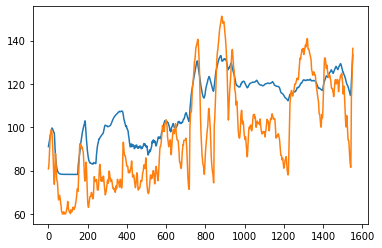

6-TS:(14.812958, 15.271462)


In [7]:

fchoice = {
    # 'is_h_size': 64,
    'ts_per_is': 12,
    'period_s': 4,
    'step_s': 2,
    'ts_per_sample': 50,
    'ts_sub': 5,
    'batch_size': 64,
    'weight_decay': 1e-05,
    'lr': 0.005*0.9,
    #'nattrs': 40,
    'dropout_rate':0.15,
    'lstm_input': 128,
    'lstm_size': 64,
    'ts_h_size': 16,
    #'disc_nlayers': 5,
    #'disc_layer_size': 64,
    #'disc_dropout_rate': 0.15
}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 80
aresults = defaultdict(dict)
for val_sub in [4,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    # fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_no_pce_{ts_sub}_val_{val_sub}_nepoch_{nepoch}.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.NoPceLstmPamap2FullTrainerJointValidation(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



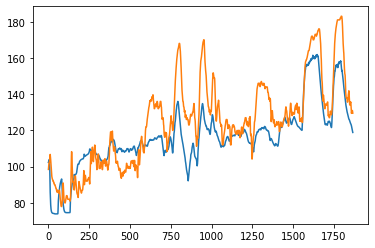

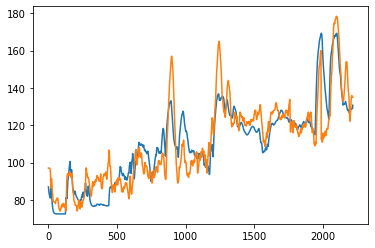

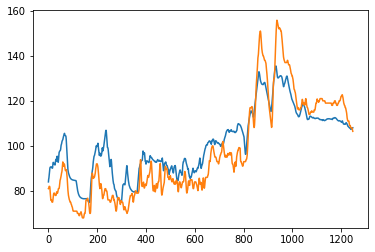

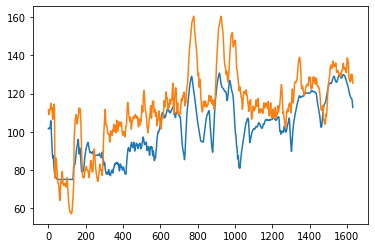

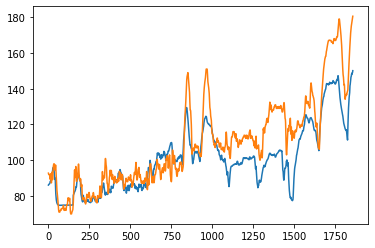

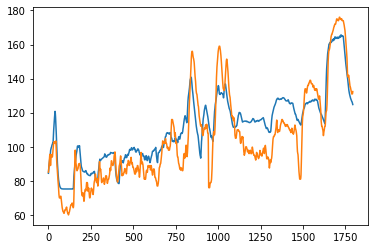

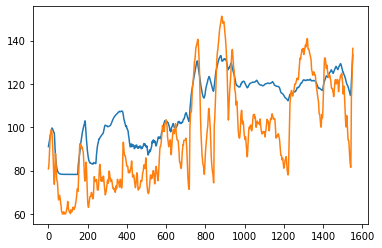

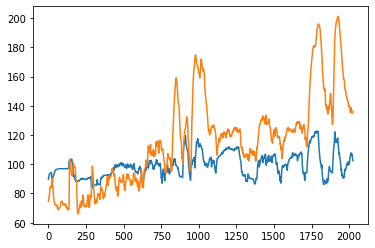

{0: [11.8656435, 12.840503],
 1: [8.170008, 9.519688],
 2: [8.410333, 8.9663725],
 3: [13.38444, 14.053137],
 4: [10.892273, 11.906092],
 5: [11.406255, 11.81605],
 6: [14.812958, 15.271462],
 7: [23.615612, 24.238918]}

In [10]:
metrics = dict()
for ts_sub in range(8):
  # bce = [r['metric'][1][0] for r in aresults[ts_sub].values()]
  # acc = [r['metric'][1][1] for r in aresults[ts_sub].values()]
  metrics[ts_sub] = [*(compute_ensemble(list(aresults[ts_sub].values())))]

# for ts_sub in range(8):
#   ds = [r['metric'][1][0] for r in aresults[ts_sub].values()]
#   print(ts_sub, np.mean(ds), ds)

# aresults[0][1]['metric'], aresults[0][1].keys()
metrics

about to train:
best val epoch: 1
[1/80]: loss_train: (20.115461, 0.5444431304931641) loss_val (19.246838, 0.5143839716911316) loss_ts (22.48549, 0.5464833378791809)
best val epoch: 2
[2/80]: loss_train: (15.991514, 0.5634981989860535) loss_val (16.384335, 0.5309131145477295) loss_ts (16.929058, 0.5621469616889954)
best val epoch: 3
[3/80]: loss_train: (12.377968, 0.5646776556968689) loss_val (16.228716, 0.5315150022506714) loss_ts (17.673527, 0.5619663596153259)
best val epoch: 4
[4/80]: loss_train: (12.261048, 0.5560726523399353) loss_val (15.230494, 0.5246293544769287) loss_ts (18.106869, 0.5583588480949402)
best val epoch: 6
[6/80]: loss_train: (9.187623, 0.5474737882614136) loss_val (14.037206, 0.5178087949752808) loss_ts (16.709269, 0.5565937161445618)
Final: (16.709269, 0.5565937161445618)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_

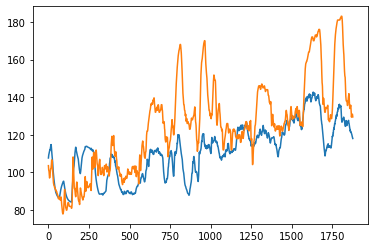

0-TS:(16.709269, 16.709269)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.873314, 0.48742201924324036) loss_val (19.338263, 0.4893294870853424) loss_ts (18.038029, 0.5319996476173401)
best val epoch: 2
[2/80]: loss_train: (17.637314, 0.495713472366333) loss_val (17.78212, 0.49535199999809265) loss_ts (15.023481, 0.5429044365882874)
best val epoch: 4
[4/80]: loss_train: (11.224618, 0.4912346303462982) loss_val (16.639162, 0.49375197291374207) loss_ts (12.4138, 0.5365190505981445)
best val epoch: 5
[5/80]: loss_train: (10.181724, 0.4876427948474884) loss_val (15.027569, 0.4915103614330292) loss_ts (12.322872, 0.532986581325531)
Final: (12.322872, 0.532986581325531)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (12.322872, 0.532986581325531)


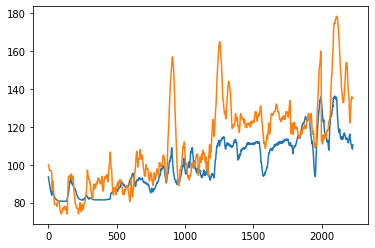

1-TS:(12.322872, 12.322872)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.336208, 0.4804525375366211) loss_val (19.48777, 0.5210762619972229) loss_ts (22.479126, 0.5172663331031799)
best val epoch: 2
[2/80]: loss_train: (17.9996, 0.4804096221923828) loss_val (17.955599, 0.5206467509269714) loss_ts (21.489841, 0.5174087285995483)
best val epoch: 5
[5/80]: loss_train: (11.608145, 0.48123931884765625) loss_val (17.579948, 0.5206385254859924) loss_ts (13.394568, 0.5175812244415283)
Final: (13.394568, 0.5175812244415283)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (13.394568, 0.5175812244415283)


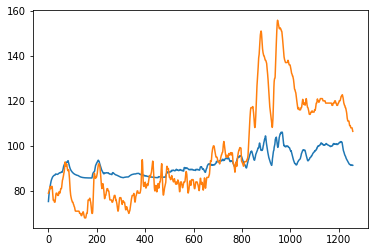

2-TS:(13.394568, 13.394568)
about to train:
best val epoch: 1
[1/80]: loss_train: (21.654192, 0.49379345774650574) loss_val (19.448626, 0.5445483922958374) loss_ts (14.88517, 0.5203641653060913)
best val epoch: 2
[2/80]: loss_train: (19.051456, 0.49411270022392273) loss_val (17.953247, 0.5441259145736694) loss_ts (15.526234, 0.519859790802002)
best val epoch: 3
[3/80]: loss_train: (12.264788, 0.49467024207115173) loss_val (15.021603, 0.5446732044219971) loss_ts (11.630464, 0.5206797122955322)
Final: (11.630464, 0.5206797122955322)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (11.630464, 0.5206797122955322)


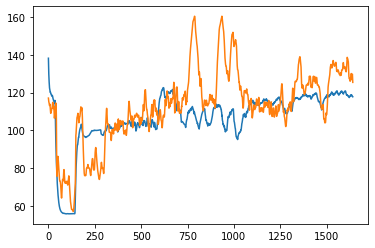

3-TS:(11.630464, 11.630464)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.68747, 0.4987808167934418) loss_val (19.681255, 0.5285511016845703) loss_ts (22.1147, 0.5343286395072937)
best val epoch: 2
[2/80]: loss_train: (19.52535, 0.49878501892089844) loss_val (19.475155, 0.5280609726905823) loss_ts (21.915503, 0.534572422504425)
best val epoch: 3
[3/80]: loss_train: (12.030591, 0.49893659353256226) loss_val (17.101383, 0.5278299450874329) loss_ts (19.362116, 0.5344780683517456)
best val epoch: 9
[9/80]: loss_train: (10.671577, 0.4988318085670471) loss_val (16.208847, 0.5281285643577576) loss_ts (15.709866, 0.5346366763114929)
Final: (15.709866, 0.5346366763114929)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (15.709866, 0.5346366763114929)


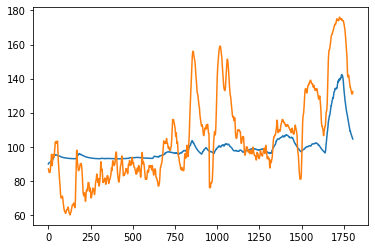

5-TS:(15.709866, 15.709866)
about to train:
best val epoch: 2
[2/80]: loss_train: (18.605785, 0.48932525515556335) loss_val (18.943037, 0.48197343945503235) loss_ts (22.94409, 0.47425684332847595)
best val epoch: 3
[3/80]: loss_train: (17.520216, 0.4896000027656555) loss_val (18.291864, 0.48226693272590637) loss_ts (19.79457, 0.4723149538040161)
best val epoch: 4
[4/80]: loss_train: (14.681558, 0.4896790683269501) loss_val (18.22709, 0.48118677735328674) loss_ts (16.781815, 0.4704104959964752)
best val epoch: 5
[5/80]: loss_train: (11.779574, 0.4894290268421173) loss_val (16.403767, 0.4807148575782776) loss_ts (14.975461, 0.4704838991165161)
best val epoch: 48
[48/80]: loss_train: (8.243964, 0.48961755633354187) loss_val (14.648677, 0.48147842288017273) loss_ts (11.963331, 0.47144994139671326)
Final: (11.963331, 0.47144994139671326)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'ls

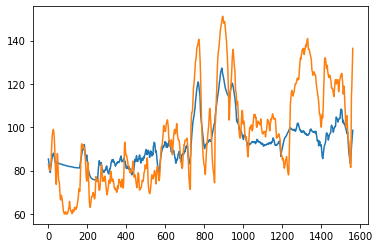

6-TS:(11.963331, 11.963331)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.04453, 0.49391603469848633) loss_val (19.415422, 0.5347700715065002) loss_ts (24.388994, 0.5133540034294128)
best val epoch: 2
[2/80]: loss_train: (17.688961, 0.4956546723842621) loss_val (18.096478, 0.5365906357765198) loss_ts (23.167591, 0.5158407092094421)
best val epoch: 4
[4/80]: loss_train: (9.091807, 0.4942464232444763) loss_val (12.353621, 0.5341643691062927) loss_ts (21.880997, 0.5133020877838135)
Final: (21.880997, 0.5133020877838135)
{'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (21.880997, 0.5133020877838135)


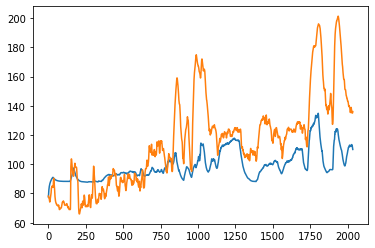

7-TS:(21.880997, 21.880997)
about to train:
best val epoch: 1
[1/80]: loss_train: (19.745108, 0.516129732131958) loss_val (21.581501, 0.5085887908935547) loss_ts (22.812948, 0.5362101793289185)
best val epoch: 2
[2/80]: loss_train: (16.173338, 0.5167677998542786) loss_val (19.218191, 0.5109961628913879) loss_ts (19.373363, 0.5428211688995361)
best val epoch: 3
[3/80]: loss_train: (11.752609, 0.5189501047134399) loss_val (13.857961, 0.5129609704017639) loss_ts (20.341831, 0.5427793264389038)
best val epoch: 4
[4/80]: loss_train: (12.002392, 0.5182033181190491) loss_val (13.605895, 0.5119039416313171) loss_ts (22.38416, 0.5417886972427368)
best val epoch: 5
[5/80]: loss_train: (9.398087, 0.5173981785774231) loss_val (12.612356, 0.5111719965934753) loss_ts (18.671267, 0.5410590767860413)
best val epoch: 8
[8/80]: loss_train: (8.271812, 0.5180026292800903) loss_val (10.523342, 0.5109139680862427) loss_ts (17.817045, 0.5390642881393433)
best val epoch: 10
[10/80]: loss_train: (8.773378, 0.5

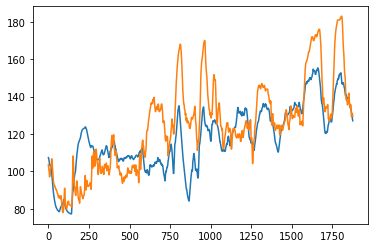

0-TS:(13.471393, 16.117802)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.699993, 0.5168882012367249) loss_val (22.126398, 0.4860891103744507) loss_ts (18.497463, 0.4759643077850342)
best val epoch: 2
[2/80]: loss_train: (18.152912, 0.51642245054245) loss_val (21.159842, 0.48676663637161255) loss_ts (16.750893, 0.47675037384033203)
best val epoch: 3
[3/80]: loss_train: (12.15568, 0.5160316824913025) loss_val (13.140742, 0.48641300201416016) loss_ts (11.8680315, 0.477098673582077)
best val epoch: 7
[7/80]: loss_train: (8.393853, 0.5166211128234863) loss_val (10.787039, 0.4853149652481079) loss_ts (13.643059, 0.47608402371406555)
best val epoch: 11
[11/80]: loss_train: (7.8557673, 0.5165152549743652) loss_val (8.764208, 0.48525238037109375) loss_ts (10.699859, 0.47619274258613586)
best val epoch: 18
[18/80]: loss_train: (7.6313252, 0.5163542032241821) loss_val (8.688175, 0.4849856495857239) loss_ts (11.153955, 0.47587600350379944)
best val epoch: 22
[22/80]: loss_train: (8.33

KeyboardInterrupt: ignored

In [ ]:

fchoice = {
  'alpha': 1, 
  'ts_per_samples': [50], 
  'val_sub': 4,
  'ts_sub': 5, 
  'batch_size': 64, 
  'weight_decay': 0.0, 
  'lr': 0.001, 
  'nattrs': 40,
  'dropout_rate': 0.15, 
  'lstm_input': 64, 
  'lstm_size': 128, 
  'ts_h_size': 16}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 80
aresults = defaultdict(dict)
for val_sub in [4,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_{ts_sub}_val_{val_sub}_alpha_{fchoice['alpha']}_nepoch_{nepoch}_no_pce_discriminator.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainer(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



about to train:
best val epoch: 1
[1/80]: loss_train: (20.244959, 0.538402259349823) loss_val (19.452208, 0.46586382389068604) loss_ts (23.076235, 0.5114714503288269)
best val epoch: 2
[2/80]: loss_train: (20.281853, 0.52944016456604) loss_val (19.32954, 0.4623646140098572) loss_ts (23.7228, 0.5151382684707642)
best val epoch: 3
[3/80]: loss_train: (19.79425, 0.5351720452308655) loss_val (19.227974, 0.4744586646556854) loss_ts (24.421963, 0.5337727069854736)
best val epoch: 4
[4/80]: loss_train: (19.022938, 0.5383705496788025) loss_val (18.90476, 0.4854918122291565) loss_ts (25.084385, 0.5518414378166199)
best val epoch: 5
[5/80]: loss_train: (17.57723, 0.5358524918556213) loss_val (17.564045, 0.49020618200302124) loss_ts (24.413967, 0.5581938028335571)
best val epoch: 6
[6/80]: loss_train: (14.497282, 0.5430274605751038) loss_val (15.431525, 0.5064504742622375) loss_ts (22.99393, 0.5798535346984863)
best val epoch: 7
[7/80]: loss_train: (11.99634, 0.5437117218971252) loss_val (13.6517

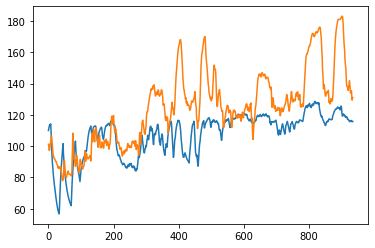

0-TS:(18.92138, 18.92138)
about to train:
best val epoch: 1
[1/80]: loss_train: (21.316248, 0.540010392665863) loss_val (19.497906, 0.4921099841594696) loss_ts (18.526033, 0.6008166074752808)
best val epoch: 2
[2/80]: loss_train: (21.038939, 0.531305193901062) loss_val (19.337938, 0.48718392848968506) loss_ts (18.269766, 0.5996277928352356)
best val epoch: 3
[3/80]: loss_train: (20.535814, 0.532439649105072) loss_val (18.97877, 0.4898394048213959) loss_ts (17.75219, 0.6042943596839905)
best val epoch: 4
[4/80]: loss_train: (18.724907, 0.5385688543319702) loss_val (17.956478, 0.4968661963939667) loss_ts (15.7297735, 0.6142174005508423)
best val epoch: 5
[5/80]: loss_train: (14.700329, 0.5430748462677002) loss_val (15.940345, 0.5051690936088562) loss_ts (12.760261, 0.6263042092323303)
best val epoch: 9
[9/80]: loss_train: (10.923123, 0.49639371037483215) loss_val (14.971228, 0.4876367151737213) loss_ts (9.411971, 0.5873187780380249)
best val epoch: 22
[22/80]: loss_train: (10.955022, 0.5

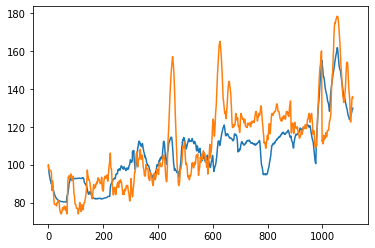

1-TS:(10.783729, 10.783729)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.28899, 0.49008363485336304) loss_val (19.41914, 0.4852336347103119) loss_ts (22.437233, 0.5200319290161133)
best val epoch: 2
[2/80]: loss_train: (18.729187, 0.5209629535675049) loss_val (18.640398, 0.5139798521995544) loss_ts (22.333858, 0.5462445616722107)
best val epoch: 3
[3/80]: loss_train: (16.83039, 0.5630736947059631) loss_val (16.870995, 0.5464358329772949) loss_ts (22.111824, 0.5817328095436096)
best val epoch: 4
[4/80]: loss_train: (15.722258, 0.5503886938095093) loss_val (16.197525, 0.5286421179771423) loss_ts (19.60075, 0.5638574957847595)
best val epoch: 5
[5/80]: loss_train: (14.592712, 0.5434965491294861) loss_val (15.689468, 0.518743097782135) loss_ts (18.098442, 0.5538861751556396)
best val epoch: 6
[6/80]: loss_train: (12.394101, 0.5319839119911194) loss_val (14.541762, 0.5103925466537476) loss_ts (15.720544, 0.5422259569168091)
best val epoch: 7
[7/80]: loss_train: (10.6440115, 0.5

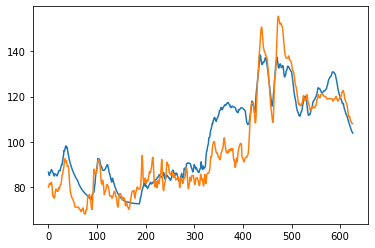

2-TS:(7.0580516, 7.0580516)
about to train:
best val epoch: 1
[1/80]: loss_train: (21.717857, 0.4979208707809448) loss_val (19.495535, 0.6007144451141357) loss_ts (14.741112, 0.5065882802009583)
best val epoch: 2
[2/80]: loss_train: (21.497475, 0.49657928943634033) loss_val (19.411922, 0.6036182641983032) loss_ts (14.891009, 0.5068718791007996)
best val epoch: 3
[3/80]: loss_train: (21.426537, 0.49858397245407104) loss_val (19.29018, 0.606705367565155) loss_ts (14.809456, 0.506868839263916)
best val epoch: 4
[4/80]: loss_train: (20.801147, 0.5058307647705078) loss_val (18.976711, 0.6105816960334778) loss_ts (14.827571, 0.5076673626899719)
best val epoch: 5
[5/80]: loss_train: (18.770988, 0.5072566270828247) loss_val (18.027874, 0.611109733581543) loss_ts (13.342857, 0.5087661147117615)
best val epoch: 6
[6/80]: loss_train: (15.414922, 0.5130314826965332) loss_val (16.590477, 0.6141024827957153) loss_ts (13.076453, 0.5107077360153198)
best val epoch: 9
[9/80]: loss_train: (12.596141, 0.

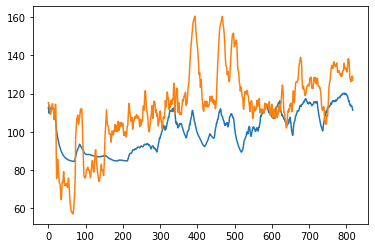

3-TS:(15.834553, 15.834553)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.486223, 0.4799557626247406) loss_val (19.515232, 0.47839152812957764) loss_ts (22.021082, 0.5871582627296448)
best val epoch: 3
[3/80]: loss_train: (18.76359, 0.49597635865211487) loss_val (18.86181, 0.4955911636352539) loss_ts (21.116692, 0.6061802506446838)
best val epoch: 4
[4/80]: loss_train: (17.978329, 0.5083274841308594) loss_val (17.934692, 0.5129948854446411) loss_ts (19.206036, 0.6182411313056946)
best val epoch: 5
[5/80]: loss_train: (17.447746, 0.5271201729774475) loss_val (17.810675, 0.5305574536323547) loss_ts (17.498419, 0.6346660256385803)
best val epoch: 6
[6/80]: loss_train: (15.654739, 0.5399481654167175) loss_val (17.33324, 0.5426961779594421) loss_ts (14.206927, 0.647591769695282)
best val epoch: 7
[7/80]: loss_train: (13.402744, 0.5506841540336609) loss_val (17.17951, 0.5525174736976624) loss_ts (11.596071, 0.6599644422531128)
best val epoch: 50
[50/80]: loss_train: (12.499559, 0

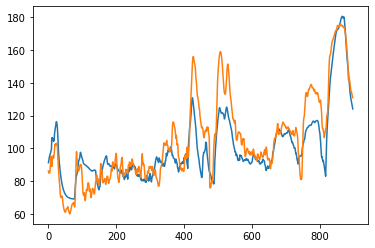

5-TS:(9.837992, 9.837992)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.590204, 0.5275467038154602) loss_val (19.574903, 0.56861412525177) loss_ts (22.389856, 0.5210363864898682)
best val epoch: 2
[2/80]: loss_train: (20.485727, 0.5237882733345032) loss_val (19.563293, 0.5689489245414734) loss_ts (22.388165, 0.5188699960708618)
best val epoch: 4
[4/80]: loss_train: (19.344957, 0.5184321403503418) loss_val (19.457922, 0.5677383542060852) loss_ts (22.336279, 0.5158272981643677)
best val epoch: 5
[5/80]: loss_train: (15.958755, 0.5131356120109558) loss_val (18.658411, 0.5622283220291138) loss_ts (21.110004, 0.5118310451507568)
best val epoch: 6
[6/80]: loss_train: (11.961565, 0.5089142322540283) loss_val (16.5645, 0.5558810234069824) loss_ts (21.88353, 0.508152961730957)
best val epoch: 8
[8/80]: loss_train: (9.80189, 0.5084779262542725) loss_val (12.846095, 0.5615532398223877) loss_ts (17.689777, 0.5044452548027039)
best val epoch: 9
[9/80]: loss_train: (10.280708, 0.51264381

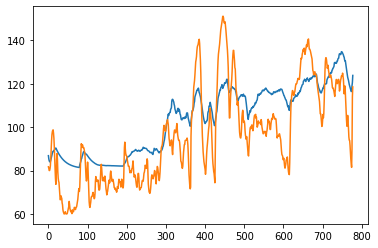

6-TS:(12.550301, 12.550301)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.2343, 0.4930606186389923) loss_val (19.506126, 0.4930160641670227) loss_ts (24.433823, 0.476339191198349)
best val epoch: 2
[2/80]: loss_train: (19.972271, 0.4889283776283264) loss_val (19.43516, 0.49282747507095337) loss_ts (24.484663, 0.46845224499702454)
best val epoch: 3
[3/80]: loss_train: (19.84674, 0.48720160126686096) loss_val (19.33243, 0.49386510252952576) loss_ts (24.570108, 0.4661024808883667)
best val epoch: 4
[4/80]: loss_train: (19.48642, 0.486043244600296) loss_val (19.205996, 0.4976139962673187) loss_ts (24.524242, 0.46285346150398254)
best val epoch: 5
[5/80]: loss_train: (18.477226, 0.4834427535533905) loss_val (18.802866, 0.5002796053886414) loss_ts (23.858637, 0.45785462856292725)
best val epoch: 6
[6/80]: loss_train: (14.480872, 0.47781607508659363) loss_val (16.83482, 0.5052443146705627) loss_ts (20.75276, 0.45451003313064575)
best val epoch: 7
[7/80]: loss_train: (12.258935, 0.

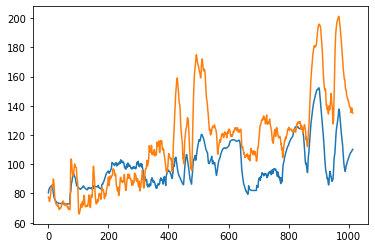

7-TS:(21.029987, 21.029987)


In [ ]:

fchoice = {
  'alpha': 0.6, 
  'ts_per_samples': [50], 
  'val_sub': 4,
  'ts_sub': 5, 
  'batch_size': 64, 
  'weight_decay': 0.0, 
  'lr': 0.001, 
  'nattrs': 40,
  'dropout_rate': 0.15, 
  'lstm_input': 64, 
  'lstm_size': 128, 
  'ts_h_size': 16,
  'step_s': 4}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 80
aresults = defaultdict(dict)
for val_sub in [4]:#,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_{ts_sub}_val_{val_sub}_alpha_{fchoice['alpha']}_nepoch_{nepoch}_step_s{fchoice['step_s']}.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainer(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



about to train:
best val epoch: 1
[1/80]: loss_train: (20.446243, 0.5330924391746521) loss_val (19.446081, 0.5819811820983887) loss_ts (23.004833, 0.4499240219593048)
best val epoch: 2
[2/80]: loss_train: (20.031687, 0.5346903800964355) loss_val (19.210783, 0.5831750631332397) loss_ts (23.210045, 0.4513828158378601)
best val epoch: 3
[3/80]: loss_train: (18.723228, 0.5367245078086853) loss_val (18.4943, 0.5860247015953064) loss_ts (22.344, 0.4528428018093109)
best val epoch: 4
[4/80]: loss_train: (16.047638, 0.538408100605011) loss_val (17.598667, 0.5887014269828796) loss_ts (21.277817, 0.45359623432159424)
best val epoch: 7
[7/80]: loss_train: (12.374755, 0.5360150933265686) loss_val (16.641167, 0.587666928768158) loss_ts (22.48546, 0.45392078161239624)
best val epoch: 39
[39/80]: loss_train: (10.452892, 0.533424437046051) loss_val (16.08017, 0.5840035080909729) loss_ts (21.764683, 0.4513716995716095)
Final: (21.764683, 0.4513716995716095)
{'step_s': 4, 'period_s': 4, 'alpha': 1, 'ts_

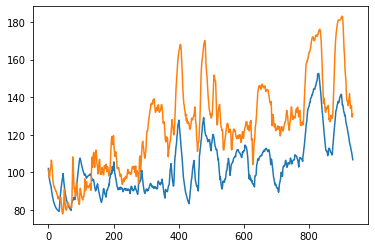

0-TS:(21.764683, 21.764683)
about to train:
best val epoch: 1
[1/80]: loss_train: (21.343466, 0.5545592904090881) loss_val (19.512323, 0.5068730115890503) loss_ts (18.542147, 0.4848581552505493)
best val epoch: 2
[2/80]: loss_train: (21.182133, 0.5605790615081787) loss_val (19.508963, 0.5125748515129089) loss_ts (18.329792, 0.49022167921066284)
best val epoch: 3
[3/80]: loss_train: (20.634233, 0.5805010795593262) loss_val (19.495926, 0.529267430305481) loss_ts (17.533892, 0.5096778869628906)
best val epoch: 4
[4/80]: loss_train: (19.519766, 0.5932003855705261) loss_val (18.940775, 0.537726879119873) loss_ts (16.484468, 0.5243144631385803)
best val epoch: 5
[5/80]: loss_train: (18.751436, 0.5922033786773682) loss_val (18.474491, 0.5356325507164001) loss_ts (16.488306, 0.5246699452400208)
best val epoch: 6
[6/80]: loss_train: (13.7529955, 0.623129665851593) loss_val (15.294222, 0.5558987259864807) loss_ts (12.076122, 0.5592988729476929)
best val epoch: 11
[11/80]: loss_train: (10.85188, 

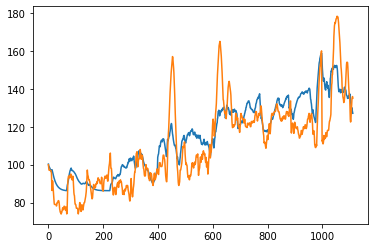

1-TS:(9.831934, 9.831934)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.577688, 0.5718066096305847) loss_val (19.501308, 0.4988781213760376) loss_ts (22.214214, 0.3826723098754883)
best val epoch: 2
[2/80]: loss_train: (20.221624, 0.5720643997192383) loss_val (19.318573, 0.49942365288734436) loss_ts (21.906296, 0.3837214410305023)
best val epoch: 3
[3/80]: loss_train: (18.759033, 0.5730544924736023) loss_val (18.60935, 0.5004456639289856) loss_ts (20.94594, 0.3846219480037689)
best val epoch: 4
[4/80]: loss_train: (14.342273, 0.5753856301307678) loss_val (16.062105, 0.501899003982544) loss_ts (16.972363, 0.3863135278224945)
Final: (16.972363, 0.3863135278224945)
{'step_s': 4, 'period_s': 4, 'alpha': 1, 'ts_per_samples': [50], 'val_sub': 4, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (16.972363, 0.3863135278224945)


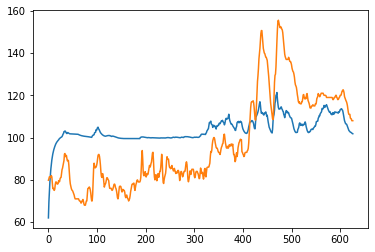

2-TS:(16.972363, 16.972363)
about to train:
best val epoch: 1
[1/80]: loss_train: (21.409945, 0.46096643805503845) loss_val (19.421036, 0.5268642902374268) loss_ts (14.607441, 0.5126721262931824)
best val epoch: 2
[2/80]: loss_train: (20.9355, 0.46157291531562805) loss_val (19.035864, 0.5272643566131592) loss_ts (14.156112, 0.513163685798645)
best val epoch: 3
[3/80]: loss_train: (19.134274, 0.465099960565567) loss_val (17.963207, 0.5288509130477905) loss_ts (12.356752, 0.5168691277503967)
best val epoch: 4
[4/80]: loss_train: (18.269297, 0.4651440680027008) loss_val (17.310392, 0.5289100408554077) loss_ts (12.1172495, 0.5171467661857605)
best val epoch: 10
[10/80]: loss_train: (12.442635, 0.46439793705940247) loss_val (17.061836, 0.5290217995643616) loss_ts (20.056528, 0.5151381492614746)
best val epoch: 18
[18/80]: loss_train: (11.772274, 0.461668998003006) loss_val (16.88184, 0.527876079082489) loss_ts (23.66267, 0.5138789415359497)
best val epoch: 24
[24/80]: loss_train: (12.164786

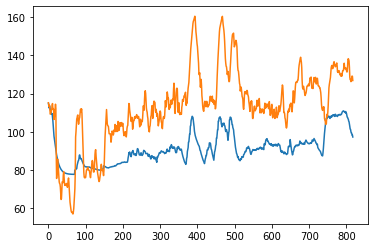

3-TS:(22.964705, 22.964705)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.559591, 0.46697524189949036) loss_val (19.48269, 0.46134790778160095) loss_ts (21.961689, 0.5479664206504822)
best val epoch: 2
[2/80]: loss_train: (20.262228, 0.4679332971572876) loss_val (19.319218, 0.46152496337890625) loss_ts (21.703056, 0.5484291911125183)
best val epoch: 3
[3/80]: loss_train: (18.817434, 0.47105202078819275) loss_val (18.797571, 0.4644627869129181) loss_ts (21.174856, 0.5516412258148193)
best val epoch: 4
[4/80]: loss_train: (15.566142, 0.47354891896247864) loss_val (16.508717, 0.46649104356765747) loss_ts (18.31002, 0.5557523965835571)
best val epoch: 7
[7/80]: loss_train: (14.097494, 0.4724999666213989) loss_val (16.0308, 0.4654478430747986) loss_ts (13.55573, 0.5547372698783875)
best val epoch: 8
[8/80]: loss_train: (10.058249, 0.4738751947879791) loss_val (10.7962475, 0.4664037525653839) loss_ts (11.977792, 0.5562955737113953)
Final: (11.977792, 0.5562955737113953)
{'step_s'

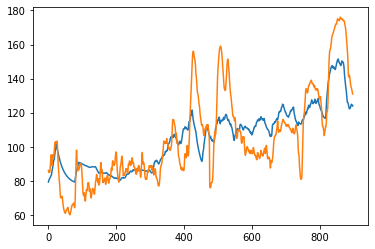

5-TS:(11.977792, 11.977792)
about to train:
best val epoch: 1
[1/80]: loss_train: (20.440277, 0.5057273507118225) loss_val (19.538702, 0.4886631965637207) loss_ts (22.649559, 0.5242332816123962)
best val epoch: 2
[2/80]: loss_train: (19.527178, 0.505676805973053) loss_val (19.348621, 0.48814019560813904) loss_ts (23.671375, 0.5226564407348633)
best val epoch: 3
[3/80]: loss_train: (18.10587, 0.5059933662414551) loss_val (18.657665, 0.4882652163505554) loss_ts (23.940472, 0.5212074518203735)
best val epoch: 4
[4/80]: loss_train: (16.740387, 0.5061381459236145) loss_val (18.02696, 0.4884378910064697) loss_ts (22.545805, 0.5208654999732971)
best val epoch: 6
[6/80]: loss_train: (14.199322, 0.5067896842956543) loss_val (18.007244, 0.489222913980484) loss_ts (19.435266, 0.5213444828987122)
best val epoch: 9
[9/80]: loss_train: (14.861365, 0.5064523816108704) loss_val (17.890692, 0.48811253905296326) loss_ts (16.262331, 0.5234524011611938)
best val epoch: 10
[10/80]: loss_train: (9.872203, 0

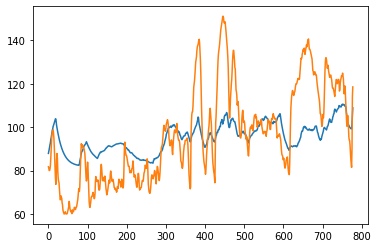

6-TS:(14.138559, 14.138559)
about to train:
best val epoch: 1
[1/80]: loss_train: (19.864359, 0.49698948860168457) loss_val (19.265549, 0.43780234456062317) loss_ts (24.127481, 0.4930776357650757)
best val epoch: 2
[2/80]: loss_train: (18.449196, 0.4972020089626312) loss_val (18.42399, 0.43988969922065735) loss_ts (22.803537, 0.4934924840927124)
best val epoch: 3
[3/80]: loss_train: (16.298508, 0.4986693561077118) loss_val (17.00852, 0.4421237111091614) loss_ts (20.325203, 0.4949468970298767)
best val epoch: 5
[5/80]: loss_train: (12.70077, 0.5014078617095947) loss_val (16.363087, 0.44242793321609497) loss_ts (22.94244, 0.49755316972732544)
best val epoch: 6
[6/80]: loss_train: (10.956132, 0.5019227862358093) loss_val (15.239779, 0.4424535036087036) loss_ts (22.217993, 0.4971618950366974)
best val epoch: 7
[7/80]: loss_train: (10.049838, 0.5025244355201721) loss_val (12.927091, 0.44290632009506226) loss_ts (19.113289, 0.4971192479133606)
best val epoch: 10
[10/80]: loss_train: (8.61539

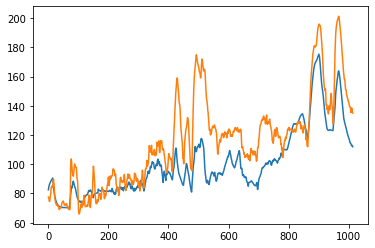

7-TS:(16.611822, 16.611822)


In [ ]:

fchoice = {
  'alpha': 1, 
  'ts_per_samples': [50], 
  'val_sub': 4,
  'ts_sub': 5, 
  'batch_size': 64, 
  'weight_decay': 0.0, 
  'lr': 0.001, 
  'nattrs': 40,
  'dropout_rate': 0.15, 
  'lstm_input': 64, 
  'lstm_size': 128, 
  'ts_h_size': 16,
  'step_s': 4}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 80
aresults = defaultdict(dict)
for val_sub in [4]:#,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_{ts_sub}_val_{val_sub}_alpha_{fchoice['alpha']}_nepoch_{nepoch}_step_s{fchoice['step_s']}.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainer(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



In [ ]:

fchoice = {
  'alpha': 0.6, 
  'ts_per_samples': [50], 
  'val_sub': 4,
  'ts_sub': 5, 
  'batch_size': 64, 
  'weight_decay': 0.0, 
  'lr': 0.001, 
  'nattrs': 40,
  'dropout_rate': 0.15, 
  'lstm_input': 64, 
  'lstm_size': 128, 
  'ts_h_size': 16}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 80
aresults = defaultdict(dict)
for val_sub in [4,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_{ts_sub}_val_{val_sub}_alpha_{fchoice['alpha']}_nepoch_{nepoch}.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainer(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



In [ ]:
import matplotlib.pyplot as plt
import pickle

fchoice = {
  'alpha': 0.6, 
  'ts_per_samples': [50], 
  'val_sub': 4,
  'ts_sub': 5, 
  'batch_size': 64, 
  'weight_decay': 0.0, 
  'lr': 0.001, 
  'nattrs': 40,
  'dropout_rate': 0.15, 
  'lstm_input': 64, 
  'lstm_size': 128, 
  'ts_h_size': 16
  }


from PPG import UtilitiesDataXY
from collections import defaultdict

aresults = defaultdict(dict)
for val_sub in range(8):
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_{ts_sub}_val_{val_sub}_alpha_{fchoice['alpha']}-joint_val.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainerJointValidation(dfs_train, args["device"], 40)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



{'alpha': 0.6, 'ts_per_samples': [50], 'val_sub': 0, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (12.995863, 0.5780997276306152)
1-TS:(12.995863, 12.995863)
{'alpha': 0.6, 'ts_per_samples': [50], 'val_sub': 0, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (9.420144, 0.881915271282196)
2-TS:(9.420144, 9.420144)
{'alpha': 0.6, 'ts_per_samples': [50], 'val_sub': 0, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16} (26.43846, 0.5937963724136353)
3-TS:(26.43846, 26.43846)
{'alpha': 0.6, 'ts_per_samples': [50], 'val_sub': 0, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 0.0, 'lr': 0.001, 'nattrs': 40, 'dropout_rate': 0.15, 'lstm_input': 64, 'lstm_size': 128, 'ts_h_size': 16}

In [ ]:
import random 
# options  = {'val_sub': [4],
#   'ts_sub': [5],
#   'batch_size': [64],
#   'weight_decay': [0.0001, 0.000],
#   'lr': [0.001, 0.005, 0.0001, 0.0005],
#   'nattrs': [40],
#   'dropout_rate': [0, 0.15, 0.25, 0.35, 0.50],
#   'lstm_input': [32, 64, 128],
#   'lstm_size': [16, 32, 64],
#   'ts_h_size': [16, 32, 64],
#   'ts_per_samples':[[40]],
#   'alpha': [0.5, 0.6, 0.7, 0.8]
#   }

options = {
        'val_sub': [4],
        'ts_sub': [5],
  'batch_size': [64],
  'weight_decay': [0.0001, 0.00001, 0.0],
  'lr': [0.001, 0.005, 0.0001, 0.0005],
  'nattrs': [40],
  'dropout_rate': [0, 0.15,0.25, 0.5],
  'lstm_input': [16, 32, 64, 128],
  'lstm_size': [16, 32, 64, 128],
  'ts_h_size': [16, 32, 64, 128],
  'ts_per_samples':[[30], [40], [50]],
  'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
  }


def choose(options):
  choice = dict()
  for k,v in options.items():
    choice[k] = random.choice(v)
  return choice

from  Optimization.Optimizers import RandomSearch
import json
import pickle

filename = "pamap_pce_lstm_discriminator_results.pkl"
save_path = os.path.join(STORE_DIR, filename)

try:
  with open(save_path, "rb") as f:
    results = pickle.load(f)
except FileNotFoundError:
  results = list()

full_trainer = RegressionHR.FullTrainer.PceLstmDiscriminatorFullTrainer(dfs_train, args["device"], 40)
searcher = RandomSearch(full_trainer, options)
searcher.results = results
while True:
  searcher.fit(1)
  with open(save_path, "wb") as f:
    pickle.dump(searcher.results, f)

In [ ]:

def compute_ensemble(results):
  ps = [v["predictions"][1].reshape(-1).numpy() for v in results]
  ys = [v["predictions"][0].reshape(-1).numpy() for v in results]

  for i in range(1, len(ys)-1):
    assert np.all(ys[i] == ys[i-1])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.plot(a)
  plt.plot(y)

  np.mean(np.abs(a - y))

compute_ensemble(dresults)

# import matplotlib.pyplot as plt


# p = p.reshape(-1)

# plt.plot(y)
# plt.plot(p)


In [ ]:
import random 
options = {
  "ts_h_size": [64, 128],
  "lstm_size": [64, 64, 128],
  "lstm_input": [64, 128, 256],
  "dropout_rate": [0.25],
  "bvp_count": [8,16],
  "nattrs": [5],
  'lr': [0.001],
  'weight_decay': [0, 0.0001],
  'batch_size': [64, 128, 256],
  'ts_sub': [0],
  'val_sub': [4]
 }

def choose(options):
  choice = dict()
  for k,v in options.items():
    choice[k] = random.choice(v)
  return choice


In [ ]:
results = list()
from PPG import UtilitiesDataXY
while True:
  full_trainer = FullTrainer.NoHrPceLstmFullTrainer(dfs_train, args["device"])
  choice = choose(options)
  try:
    out = full_trainer.train(**choice)
    print(out["args"], out["metric"])
    results.append([out["args"], out["metric"]])
  except RuntimeError as e:
    if isinstance(e, KeyboardInterrupt):
      raise e
    else:
      print("####")
      print(f"Failed: {choice}")
      print("###")

In [ ]:
results

In [ ]:
fchoice = {'val_sub': 4,
  'ts_sub': 0,
  'batch_size': 64,
  'weight_decay': 0,
  'lr': 0.001,
  'nattrs': 5,
  'bvp_count': 16,
  'dropout_rate': 0.25,
  'lstm_input': 128,
  'lstm_size': 64,
  'ts_h_size': 64}


dresults = list()
from PPG import UtilitiesDataXY
ts_sub = 3
for val_sub in [i for i in range(15) if i != ts_sub]:
  full_trainer = FullTrainer.NoHrPceLstmFullTrainer(dfs_train, args["device"])
  try:
    fchoice["ts_sub"] = ts_sub
    fchoice["val_sub"] = val_sub
    out = full_trainer.train(**fchoice)
    print(out["args"], out["metric"])
    dresults.append([out])
  except RuntimeError as e:
    if isinstance(e, KeyboardInterrupt):
      raise e
    else:
      print("####")
      print(f"Failed: {choice}")
      print("###")

In [ ]:
y = 

In [ ]:
full_trainer = FullTrainer.AttentionFullTrainer(dfs_train, args["device"], 0, 1)

full_trainer.train()

In [ ]:
from PPG import UtilitiesDataXY 


transformers = PPG.AttentionDefaults.get_preprocessing_transformer()
make_loaders = UtilitiesDataXY.DataLoaderFactory(transformers, dfs_train).make_loaders

loader_tr, loader_val, loader_ts = make_loaders(ts_sub=0, val_sub=1)

In [ ]:
from PPG.Models import SnippetConvolutionalTransformer

net = SnippetConvolutionalTransformer().to(args["device"])

# x,y = next(iter(loader_tr))

# p = net(x)

criterion = nn.MSELoss().to(args["device"])# nn.L1Loss().to(args["device"]) #nn.CrossEntropyLoss().to(args["device"])
optimizer = torch.optim.Adam(net.parameters(), lr=args["lr"],
                             weight_decay=args["weight_decay"])


In [ ]:
from PPG.TrainerXY import (EpochTrainerXY, MetricsComputerXY, TrainHelperXY)
from preprocessing_utils import ZTransformer2

epoch_trainer = EpochTrainerXY(net, optimizer, criterion, args["device"])
ztransformer = ZTransformer2(['heart_rate', 'wrist-ACC-0', 'wrist-ACC-1', 'wrist-ACC-2',
              'wrist-BVP-0', 'wrist-EDA-0', 'wrist-TEMP-0', 'chest-ACC-0',
              'chest-ACC-1', 'chest-ACC-2', 'chest-Resp-0'])
metrics_comuter = MetricsComputerXY(ztransformer)

train_helper = TrainHelperXY(epoch_trainer, loader_tr, loader_val, loader_ts, metrics_comuter.mae)

In [ ]:
train_helper.train(30)